In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from random import shuffle
from tqdm import tqdm
# import matplotlib.pyplot as plt
import random
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.autograd as autograd

import evaluate_plot as eval_plot
import batchify as batchify
import tbm as tbm
from sklearn.metrics import precision_recall_fscore_support

import os
# 1 starts the process on GPU-0
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
torch.__version__

'0.4.0'

In [2]:
data = pickle.load(open('../../Data/final_Physionet_avg_new.pkl','rb'))
# data['data_headers']

In [3]:
# # This is just for testing
# data['train_ids'] = data['train_ids'][:20]
# data['val_ids'] = data['val_ids'][:20]
# data['test_ids'] = data['test_ids'][:20]

In [4]:
params = {'bilstm_flag':True,
        'hidden_dim' : 150,
        'input_dim':50,
        'dropout' : 0.9,
        'layers' : 1,
        'tagset_size' : 2,
        'bilstm_flag' : True,
        'attn_category' : 'dot',
        'num_features' : 37,
        'batch_size':1,
        'model_name':'TBM-Phy-'}
pickle.dump(params, open('../../Models/config_'+params['model_name']+'.pt','wb'))

In [5]:
model_RNN = tbm.RNN_osaka(params).cuda()
loss_function = nn.NLLLoss()
# optimizer = optim.Adam(model_RNN.parameters(), lr=0.01, weight_decay=0.00005)
optimizer = optim.SGD(model_RNN.parameters(), lr=0.0001, weight_decay=0.000000002)

/home/bsingh/anaconda2/lib/python2.7/site-packages/torch/nn/modules/rnn.py:38: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Dot Attention is being used!


In [6]:
mode = 'normal'
if(mode=='normal'):
    feature_ind = 0
    label_ind = -1
    print "NORMAL mode with Flags"

NORMAL mode with Flags


In [7]:
batch_size = 1
epochs = 45
save_flag = True
dict_df_prf_mod = {}
print "==x=="*20
print "Data Statistics"
print "Train Data: "+str(len(data['train_ids']))
print "Val Data: "+str(len(data['val_ids']))
print "Test Data: "+str(len(data['test_ids']))
print "==x=="*20

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==
Data Statistics
Train Data: 2517
Val Data: 630
Test Data: 787
==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==


  0%|          | 0/2517 [00:00<?, ?it/s]

=#==#==#==#==#=0=#==#==#==#==#=


100%|██████████| 2517/2517 [01:53<00:00, 22.13it/s]


==========Epoch No:0==========
Training Loss: 1625.39321759
Train: (0.5737091379751277, 0.6285260230433055, 0.5350468818229418, None)
                    0            1
Precision    0.457831     0.640578
Recall       0.082519     0.943609
F-score      0.139834     0.763111
Count      921.000000  1596.000000
--------
Val: (0.5618337939202527, 0.6111111111111112, 0.5057420186491658, None)
                    0           1
Precision    0.470588    0.619128
Recall       0.065844    0.953488
F-score      0.115523    0.750763
Count      243.000000  387.000000
--------
Test: (0.5944988758527919, 0.6264294790343075, 0.5286488607771925, None)
                    0           1
Precision    0.531915    0.632432
Recall       0.084175    0.955102
F-score      0.145349    0.760976
Count      297.000000  490.000000




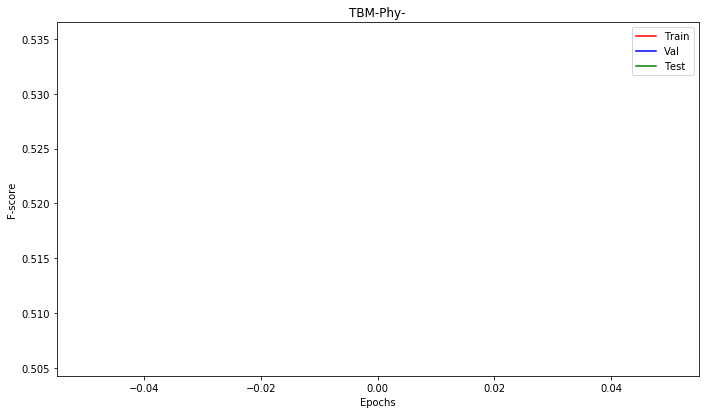

  0%|          | 3/2517 [00:00<01:43, 24.29it/s]

==========Epoch0========
TRAIN: (0.5737091379751277, 0.6285260230433055, 0.5350468818229418)
VAL: (0.5618337939202527, 0.6111111111111112, 0.5057420186491658)
TEST: (0.5944988758527919, 0.6264294790343075, 0.5286488607771925)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.457831     0.640578    0.470588    0.619128    0.531915   
Recall       0.082519     0.943609    0.065844    0.953488    0.084175   
F-score      0.139834     0.763111    0.115523    0.750763    0.145349   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.632432  
Recall       0.955102  
F-score      0.760976  
Count      490.000000  
=#==#==#==#==#=1=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.38it/s]


==========Epoch No:1==========
Training Loss: 1571.42873073
Train: (0.6320279243997957, 0.6471990464839095, 0.5581797392401937, None)
                    0            1
Precision    0.600000     0.650510
Recall       0.107492     0.958647
F-score      0.182320     0.775076
Count      921.000000  1596.000000
--------
Val: (0.6528432640024336, 0.6428571428571429, 0.5625838989323666, None)
                    0           1
Precision    0.673077    0.640138
Recall       0.144033    0.956072
F-score      0.237288    0.766839
Count      243.000000  387.000000
--------
Test: (0.6216289956737265, 0.639135959339263, 0.5673569830420641, None)
                    0           1
Precision    0.582278    0.645480
Recall       0.154882    0.932653
F-score      0.244681    0.762938
Count      297.000000  490.000000




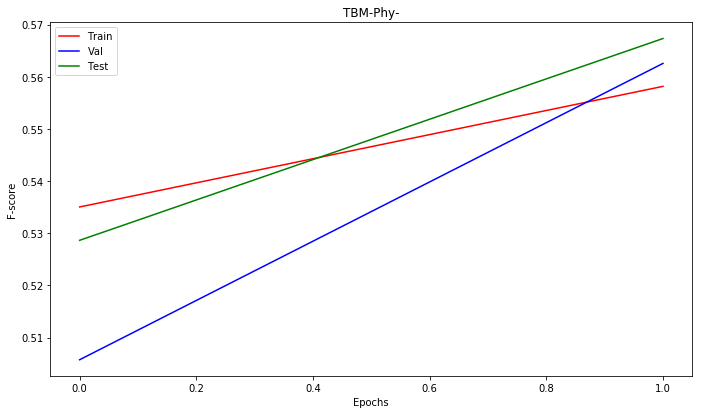

  0%|          | 3/2517 [00:00<01:30, 27.91it/s]

==========Epoch1========
TRAIN: (0.6320279243997957, 0.6471990464839095, 0.5581797392401937)
VAL: (0.6528432640024336, 0.6428571428571429, 0.5625838989323666)
TEST: (0.6216289956737265, 0.639135959339263, 0.5673569830420641)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.600000     0.650510    0.673077    0.640138    0.582278   
Recall       0.107492     0.958647    0.144033    0.956072    0.154882   
F-score      0.182320     0.775076    0.237288    0.766839    0.244681   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.645480  
Recall       0.932653  
F-score      0.762938  
Count      490.000000  
=#==#==#==#==#=2=#==#==#==#==#=


100%|██████████| 2517/2517 [01:54<00:00, 21.98it/s]


==========Epoch No:2==========
Training Loss: 1551.54969975
Train: (0.6505320082597873, 0.6603098927294399, 0.5943861417544795, None)
                    0            1
Precision    0.626923     0.664156
Recall       0.176982     0.939223
F-score      0.276037     0.778095
Count      921.000000  1596.000000
--------
Val: (0.6599020422122337, 0.6587301587301587, 0.6060777214421202, None)
                    0           1
Precision    0.662791    0.658088
Recall       0.234568    0.925065
F-score      0.346505    0.769066
Count      243.000000  387.000000
--------
Test: (0.616681522501849, 0.639135959339263, 0.588685326968028, None)
                    0           1
Precision    0.555556    0.653731
Recall       0.218855    0.893878
F-score      0.314010    0.755172
Count      297.000000  490.000000




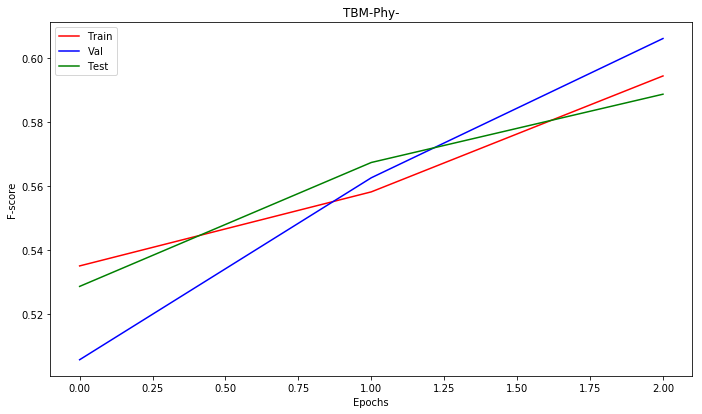

  0%|          | 3/2517 [00:00<02:02, 20.57it/s]

==========Epoch2========
TRAIN: (0.6505320082597873, 0.6603098927294399, 0.5943861417544795)
VAL: (0.6599020422122337, 0.6587301587301587, 0.6060777214421202)
TEST: (0.616681522501849, 0.639135959339263, 0.588685326968028)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.626923     0.664156    0.662791    0.658088    0.555556   
Recall       0.176982     0.939223    0.234568    0.925065    0.218855   
F-score      0.276037     0.778095    0.346505    0.769066    0.314010   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.653731  
Recall       0.893878  
F-score      0.755172  
Count      490.000000  
=#==#==#==#==#=3=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.29it/s]


==========Epoch No:3==========
Training Loss: 1528.61658022
Train: (0.6672238512129967, 0.6702423520063567, 0.6106849908093578, None)
                    0            1
Precision    0.659649     0.671595
Recall       0.204126     0.939223
F-score      0.311774     0.783177
Count      921.000000  1596.000000
--------
Val: (0.6486603773584906, 0.6555555555555556, 0.6106113546836399, None)
                    0           1
Precision    0.630000    0.660377
Recall       0.259259    0.904393
F-score      0.367347    0.763359
Count      243.000000  387.000000
--------
Test: (0.6313160681394175, 0.6493011435832274, 0.6101026116763705, None)
                    0           1
Precision    0.575540    0.665123
Recall       0.269360    0.879592
F-score      0.366972    0.757469
Count      297.000000  490.000000




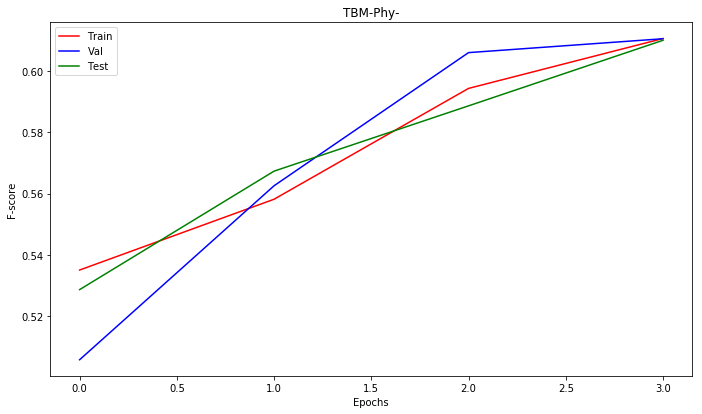

  0%|          | 3/2517 [00:00<02:26, 17.19it/s]

==========Epoch3========
TRAIN: (0.6672238512129967, 0.6702423520063567, 0.6106849908093578)
VAL: (0.6486603773584906, 0.6555555555555556, 0.6106113546836399)
TEST: (0.6313160681394175, 0.6493011435832274, 0.6101026116763705)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.659649     0.671595    0.630000    0.660377    0.575540   
Recall       0.204126     0.939223    0.259259    0.904393    0.269360   
F-score      0.311774     0.783177    0.367347    0.763359    0.366972   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.665123  
Recall       0.879592  
F-score      0.757469  
Count      490.000000  
=#==#==#==#==#=4=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.53it/s]


==========Epoch No:4==========
Training Loss: 1507.08029339
Train: (0.6771025690423539, 0.6801748112832737, 0.6317156220308813, None)
                    0            1
Precision    0.668605     0.682006
Recall       0.249729     0.928571
F-score      0.363636     0.786415
Count      921.000000  1596.000000
--------
Val: (0.6572366530007111, 0.6666666666666666, 0.6386468662751515, None)
                    0           1
Precision    0.624060    0.678068
Recall       0.341564    0.870801
F-score      0.441489    0.762443
Count      243.000000  387.000000
--------
Test: (0.6312463156596682, 0.6493011435832274, 0.6213934674307577, None)
                    0           1
Precision    0.562130    0.673139
Recall       0.319865    0.848980
F-score      0.407725    0.750903
Count      297.000000  490.000000




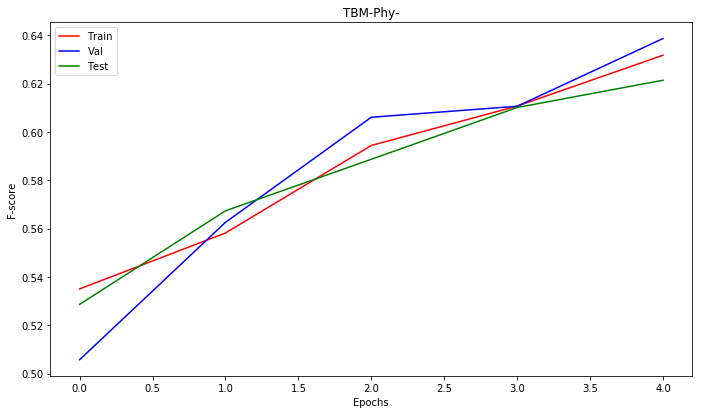

  0%|          | 3/2517 [00:00<01:36, 25.97it/s]

==========Epoch4========
TRAIN: (0.6771025690423539, 0.6801748112832737, 0.6317156220308813)
VAL: (0.6572366530007111, 0.6666666666666666, 0.6386468662751515)
TEST: (0.6312463156596682, 0.6493011435832274, 0.6213934674307577)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.668605     0.682006    0.624060    0.678068    0.562130   
Recall       0.249729     0.928571    0.341564    0.870801    0.319865   
F-score      0.363636     0.786415    0.441489    0.762443    0.407725   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.673139  
Recall       0.848980  
F-score      0.750903  
Count      490.000000  
=#==#==#==#==#=5=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.56it/s]


==========Epoch No:5==========
Training Loss: 1494.233679
Train: (0.6753288435426247, 0.6825586015097338, 0.6419686570516948, None)
                    0            1
Precision    0.653266     0.688060
Recall       0.282302     0.913534
F-score      0.394238     0.784926
Count      921.000000  1596.000000
--------
Val: (0.6636128931309655, 0.6714285714285714, 0.6434053268765132, None)
                    0           1
Precision    0.636364    0.680723
Recall       0.345679    0.875969
F-score      0.448000    0.766102
Count      243.000000  387.000000
--------
Test: (0.6262352937029101, 0.6454891994917408, 0.6162375253500387, None)
                    0           1
Precision    0.554217    0.669887
Recall       0.309764    0.848980
F-score      0.397408    0.748875
Count      297.000000  490.000000




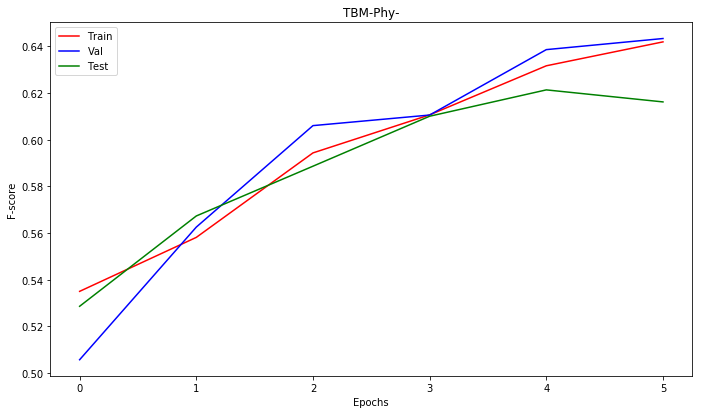

  0%|          | 3/2517 [00:00<01:31, 27.55it/s]

==========Epoch5========
TRAIN: (0.6753288435426247, 0.6825586015097338, 0.6419686570516948)
VAL: (0.6636128931309655, 0.6714285714285714, 0.6434053268765132)
TEST: (0.6262352937029101, 0.6454891994917408, 0.6162375253500387)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.653266     0.688060    0.636364    0.680723    0.554217   
Recall       0.282302     0.913534    0.345679    0.875969    0.309764   
F-score      0.394238     0.784926    0.448000    0.766102    0.397408   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.669887  
Recall       0.848980  
F-score      0.748875  
Count      490.000000  
=#==#==#==#==#=6=#==#==#==#==#=


100%|██████████| 2517/2517 [02:00<00:00, 20.95it/s]


==========Epoch No:6==========
Training Loss: 1482.96710292
Train: (0.6841023936418451, 0.690901867302344, 0.6568709895613294, None)
                    0            1
Precision    0.661400     0.697203
Recall       0.318132     0.906015
F-score      0.429619     0.788011
Count      921.000000  1596.000000
--------
Val: (0.6599096033720989, 0.6698412698412698, 0.6466984637418761, None)
                    0           1
Precision    0.620690    0.684536
Recall       0.370370    0.857881
F-score      0.463918    0.761468
Count      243.000000  387.000000
--------
Test: (0.6119735557888145, 0.6327827191867853, 0.6086304610330088, None)
                    0           1
Precision    0.521739    0.666667
Recall       0.323232    0.820408
F-score      0.399168    0.735590
Count      297.000000  490.000000




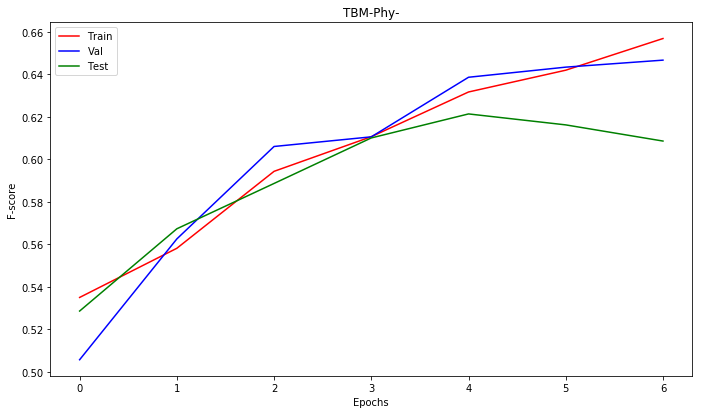

  0%|          | 3/2517 [00:00<02:09, 19.42it/s]

==========Epoch6========
TRAIN: (0.6841023936418451, 0.690901867302344, 0.6568709895613294)
VAL: (0.6599096033720989, 0.6698412698412698, 0.6466984637418761)
TEST: (0.6119735557888145, 0.6327827191867853, 0.6086304610330088)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.661400     0.697203    0.620690    0.684536    0.521739   
Recall       0.318132     0.906015    0.370370    0.857881    0.323232   
F-score      0.429619     0.788011    0.463918    0.761468    0.399168   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.666667  
Recall       0.820408  
F-score      0.735590  
Count      490.000000  
=#==#==#==#==#=7=#==#==#==#==#=


100%|██████████| 2517/2517 [01:59<00:00, 21.11it/s]


==========Epoch No:7==========
Training Loss: 1476.68485543
Train: (0.680233241860604, 0.6901072705601907, 0.6613161228225444, None)
                    0            1
Precision    0.643585     0.701382
Recall       0.343105     0.890351
F-score      0.447592     0.784649
Count      921.000000  1596.000000
--------
Val: (0.6630744603444094, 0.6730158730158731, 0.6535574791424807, None)
                    0           1
Precision    0.619355    0.690526
Recall       0.395062    0.847545
F-score      0.482412    0.761021
Count      243.000000  387.000000
--------
Test: (0.6190508446072203, 0.6378653113087674, 0.6165084664186058, None)
                    0           1
Precision    0.531250    0.672269
Recall       0.343434    0.816327
F-score      0.417178    0.737327
Count      297.000000  490.000000




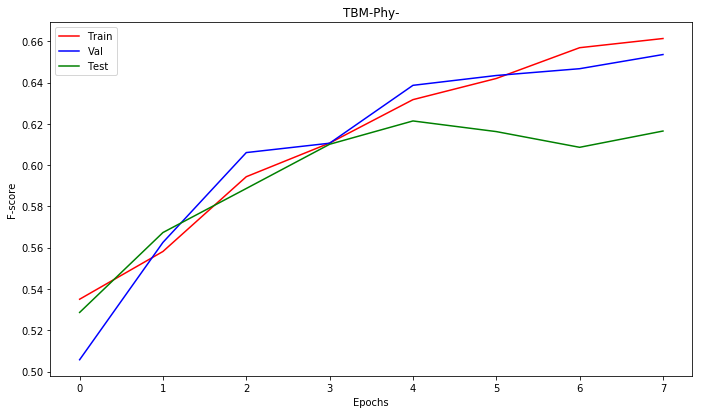

  0%|          | 3/2517 [00:00<01:29, 28.19it/s]

==========Epoch7========
TRAIN: (0.680233241860604, 0.6901072705601907, 0.6613161228225444)
VAL: (0.6630744603444094, 0.6730158730158731, 0.6535574791424807)
TEST: (0.6190508446072203, 0.6378653113087674, 0.6165084664186058)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.643585     0.701382    0.619355    0.690526    0.531250   
Recall       0.343105     0.890351    0.395062    0.847545    0.343434   
F-score      0.447592     0.784649    0.482412    0.761021    0.417178   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.672269  
Recall       0.816327  
F-score      0.737327  
Count      490.000000  
=#==#==#==#==#=8=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.60it/s]


==========Epoch No:8==========
Training Loss: 1469.57161
Train: (0.6944464269712463, 0.7012316249503378, 0.6744799673865248, None)
                    0            1
Precision    0.668663     0.709325
Recall       0.363735     0.895990
F-score      0.471167     0.791805
Count      921.000000  1596.000000
--------
Val: (0.685626102292769, 0.6904761904761905, 0.6684362548663676, None)
                    0           1
Precision    0.666667    0.697531
Recall       0.395062    0.875969
F-score      0.496124    0.776632
Count      243.000000  387.000000
--------
Test: (0.6351577368568593, 0.6518424396442185, 0.6292468324714314, None)
                    0           1
Precision    0.562162    0.679402
Recall       0.350168    0.834694
F-score      0.431535    0.749084
Count      297.000000  490.000000




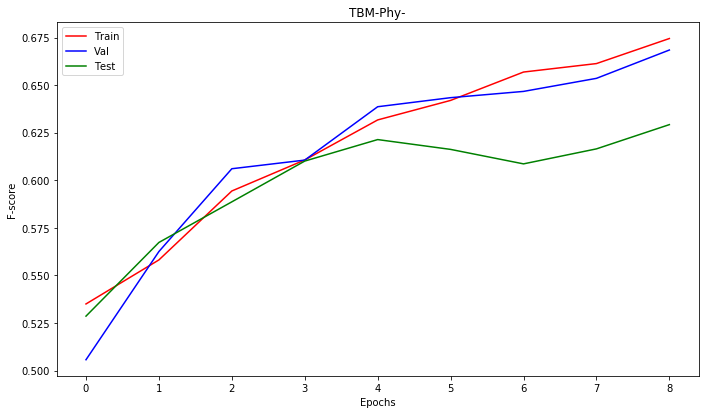

  0%|          | 3/2517 [00:00<01:43, 24.36it/s]

==========Epoch8========
TRAIN: (0.6944464269712463, 0.7012316249503378, 0.6744799673865248)
VAL: (0.685626102292769, 0.6904761904761905, 0.6684362548663676)
TEST: (0.6351577368568593, 0.6518424396442185, 0.6292468324714314)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.668663     0.709325    0.666667    0.697531    0.562162   
Recall       0.363735     0.895990    0.395062    0.875969    0.350168   
F-score      0.471167     0.791805    0.496124    0.776632    0.431535   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.679402  
Recall       0.834694  
F-score      0.749084  
Count      490.000000  
=#==#==#==#==#=9=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.28it/s]


==========Epoch No:9==========
Training Loss: 1457.22734779
Train: (0.6944692384758233, 0.7016289233214144, 0.675798919364548, None)
                    0            1
Precision    0.666667     0.710513
Recall       0.369164     0.893484
F-score      0.475192     0.791563
Count      921.000000  1596.000000
--------
Val: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447, None)
                    0           1
Precision    0.638037    0.702355
Recall       0.427984    0.847545
F-score      0.512315    0.768150
Count      243.000000  387.000000
--------
Test: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605, None)
                    0           1
Precision    0.570732    0.690722
Recall       0.393939    0.820408
F-score      0.466135    0.750000
Count      297.000000  490.000000




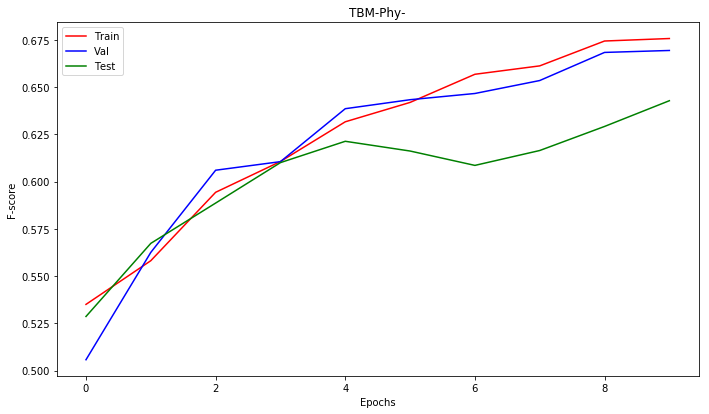

  0%|          | 3/2517 [00:00<02:04, 20.23it/s]

==========Epoch9========
TRAIN: (0.6944692384758233, 0.7016289233214144, 0.675798919364548)
VAL: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447)
TEST: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.666667     0.710513    0.638037    0.702355    0.570732   
Recall       0.369164     0.893484    0.427984    0.847545    0.393939   
F-score      0.475192     0.791563    0.512315    0.768150    0.466135   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690722  
Recall       0.820408  
F-score      0.750000  
Count      490.000000  
=#==#==#==#==#=10=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.37it/s]


==========Epoch No:10==========
Training Loss: 1455.09953147
Train: (0.695838400360763, 0.7024235200635678, 0.6760750411225629, None)
                    0            1
Precision    0.670635     0.710383
Recall       0.366992     0.895990
F-score      0.474386     0.792463
Count      921.000000  1596.000000
--------
Val: (0.6612299465240642, 0.6714285714285714, 0.651541335717267, None)
                    0           1
Precision    0.616883    0.689076
Recall       0.390947    0.847545
F-score      0.478589    0.760139
Count      243.000000  387.000000
--------
Test: (0.6445220985301643, 0.6594663278271918, 0.6385307405469601, None)
                    0           1
Precision    0.576720    0.685619
Recall       0.367003    0.836735
F-score      0.448560    0.753676
Count      297.000000  490.000000




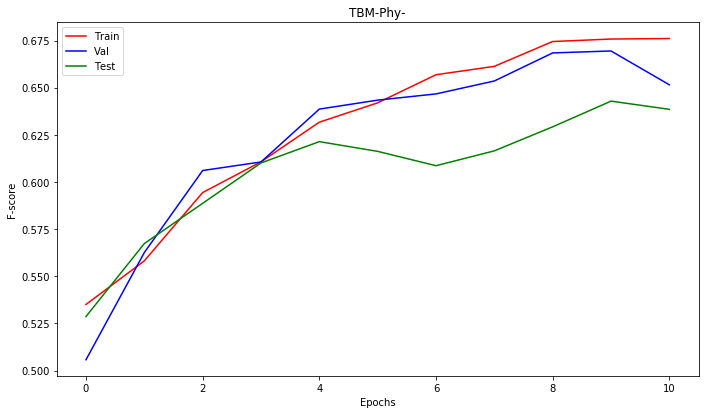

  0%|          | 3/2517 [00:00<01:35, 26.20it/s]

==========Epoch9========
TRAIN: (0.6944692384758233, 0.7016289233214144, 0.675798919364548)
VAL: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447)
TEST: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.666667     0.710513    0.638037    0.702355    0.570732   
Recall       0.369164     0.893484    0.427984    0.847545    0.393939   
F-score      0.475192     0.791563    0.512315    0.768150    0.466135   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690722  
Recall       0.820408  
F-score      0.750000  
Count      490.000000  
=#==#==#==#==#=11=#==#==#==#==#=


100%|██████████| 2517/2517 [01:55<00:00, 21.84it/s]


==========Epoch No:11==========
Training Loss: 1444.13572964
Train: (0.703828141541062, 0.709574890742948, 0.6859257630133129, None)
                    0            1
Precision    0.680608     0.717228
Recall       0.388708     0.894737
F-score      0.494817     0.796209
Count      921.000000  1596.000000
--------
Val: (0.660989010989011, 0.6714285714285714, 0.6541353383458647, None)
                    0           1
Precision    0.611111    0.692308
Recall       0.407407    0.837209
F-score      0.488889    0.757895
Count      243.000000  387.000000
--------
Test: (0.6213905188798716, 0.639135959339263, 0.6198889952937582, None)
                    0           1
Precision    0.532663    0.675170
Recall       0.356902    0.810204
F-score      0.427419    0.736549
Count      297.000000  490.000000




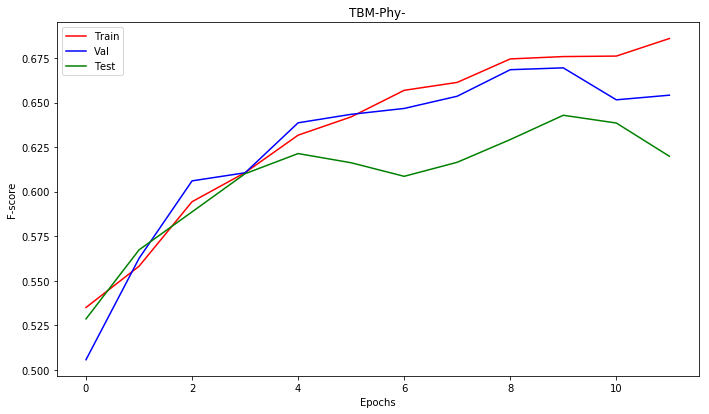

  0%|          | 3/2517 [00:00<01:44, 23.95it/s]

==========Epoch9========
TRAIN: (0.6944692384758233, 0.7016289233214144, 0.675798919364548)
VAL: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447)
TEST: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.666667     0.710513    0.638037    0.702355    0.570732   
Recall       0.369164     0.893484    0.427984    0.847545    0.393939   
F-score      0.475192     0.791563    0.512315    0.768150    0.466135   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690722  
Recall       0.820408  
F-score      0.750000  
Count      490.000000  
=#==#==#==#==#=12=#==#==#==#==#=


100%|██████████| 2517/2517 [01:48<00:00, 23.15it/s]


==========Epoch No:12==========
Training Loss: 1444.80542994
Train: (0.6993760211605798, 0.7067938021454112, 0.6846422128242006, None)
                    0            1
Precision    0.667890     0.717546
Recall       0.395223     0.886591
F-score      0.496589     0.793161
Count      921.000000  1596.000000
--------
Val: (0.666561601928247, 0.6761904761904762, 0.65883818688945, None)
                    0           1
Precision    0.621118    0.695096
Recall       0.411523    0.842377
F-score      0.495050    0.761682
Count      243.000000  387.000000
--------
Test: (0.6282116248102124, 0.6442185514612452, 0.6274151218990844, None)
                    0           1
Precision    0.541063    0.681034
Recall       0.377104    0.806122
F-score      0.444444    0.738318
Count      297.000000  490.000000




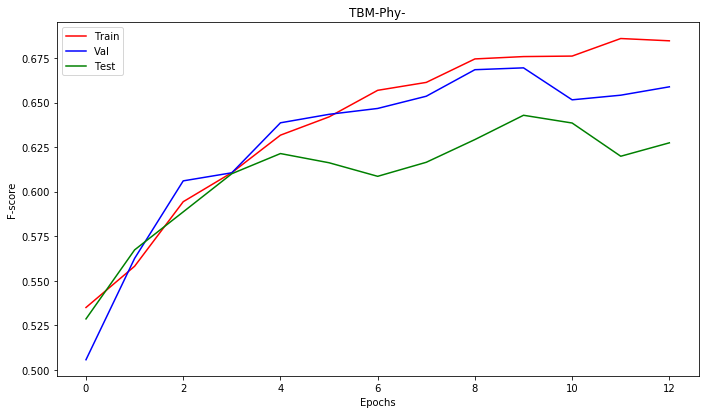

  0%|          | 3/2517 [00:00<01:55, 21.68it/s]

==========Epoch9========
TRAIN: (0.6944692384758233, 0.7016289233214144, 0.675798919364548)
VAL: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447)
TEST: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.666667     0.710513    0.638037    0.702355    0.570732   
Recall       0.369164     0.893484    0.427984    0.847545    0.393939   
F-score      0.475192     0.791563    0.512315    0.768150    0.466135   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690722  
Recall       0.820408  
F-score      0.750000  
Count      490.000000  
=#==#==#==#==#=13=#==#==#==#==#=


100%|██████████| 2517/2517 [01:51<00:00, 22.55it/s]


==========Epoch No:13==========
Training Loss: 1434.83831668
Train: (0.6976425592210636, 0.7052046086611045, 0.6823932246275458, None)
                    0            1
Precision    0.666048     0.715875
Recall       0.389794     0.887218
F-score      0.491781     0.792389
Count      921.000000  1596.000000
--------
Val: (0.668235294117647, 0.6777777777777778, 0.6631861205050726, None)
                    0           1
Precision    0.617647    0.700000
Recall       0.432099    0.832041
F-score      0.508475    0.760331
Count      243.000000  387.000000
--------
Test: (0.6292114522397315, 0.6442185514612452, 0.6294636821393789, None)
                    0           1
Precision    0.539535    0.683566
Recall       0.390572    0.797959
F-score      0.453125    0.736347
Count      297.000000  490.000000




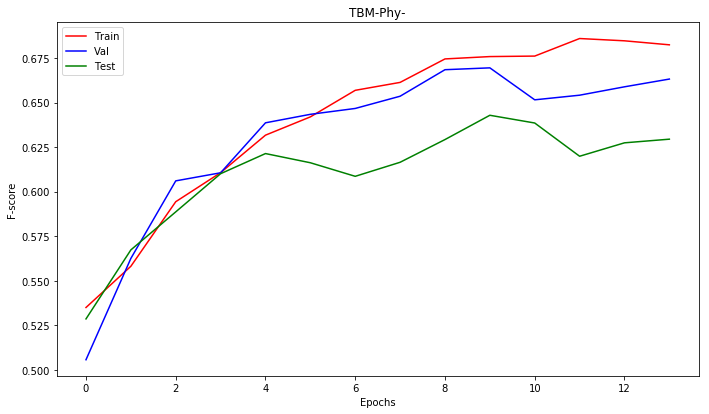

  0%|          | 4/2517 [00:00<01:17, 32.47it/s]

==========Epoch9========
TRAIN: (0.6944692384758233, 0.7016289233214144, 0.675798919364548)
VAL: (0.6775468380229221, 0.6857142857142857, 0.6694708182877447)
TEST: (0.6454395493273105, 0.6594663278271918, 0.6428744994608605)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.666667     0.710513    0.638037    0.702355    0.570732   
Recall       0.369164     0.893484    0.427984    0.847545    0.393939   
F-score      0.475192     0.791563    0.512315    0.768150    0.466135   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.690722  
Recall       0.820408  
F-score      0.750000  
Count      490.000000  
=#==#==#==#==#=14=#==#==#==#==#=


100%|██████████| 2517/2517 [01:49<00:00, 23.09it/s]


==========Epoch No:14==========
Training Loss: 1430.06159046
Train: (0.6985537446741371, 0.7059992054032579, 0.6834295079398907, None)
                    0            1
Precision    0.667283     0.716599
Recall       0.391965     0.887218
F-score      0.493844     0.792833
Count      921.000000  1596.000000
--------
Val: (0.6807629551865017, 0.6888888888888889, 0.6756152023332119, None)
                    0           1
Precision    0.635838    0.708972
Recall       0.452675    0.837209
F-score      0.528846    0.767773
Count      243.000000  387.000000
--------
Test: (0.6318343578423423, 0.6454891994917408, 0.6329413912475516, None)
                    0           1
Precision    0.540179    0.687389
Recall       0.407407    0.789796
F-score      0.464491    0.735043
Count      297.000000  490.000000




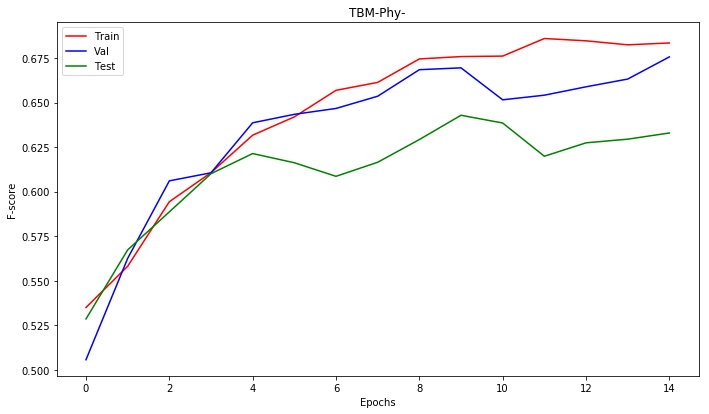

  0%|          | 3/2517 [00:00<01:24, 29.58it/s]

==========Epoch14========
TRAIN: (0.6985537446741371, 0.7059992054032579, 0.6834295079398907)
VAL: (0.6807629551865017, 0.6888888888888889, 0.6756152023332119)
TEST: (0.6318343578423423, 0.6454891994917408, 0.6329413912475516)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.667283     0.716599    0.635838    0.708972    0.540179   
Recall       0.391965     0.887218    0.452675    0.837209    0.407407   
F-score      0.493844     0.792833    0.528846    0.767773    0.464491   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.687389  
Recall       0.789796  
F-score      0.735043  
Count      490.000000  
=#==#==#==#==#=15=#==#==#==#==#=


100%|██████████| 2517/2517 [01:54<00:00, 21.96it/s]


==========Epoch No:15==========
Training Loss: 1427.02625287
Train: (0.6911312374804571, 0.7012316249503378, 0.6832743550607806, None)
                    0            1
Precision    0.641068     0.720021
Recall       0.416938     0.865288
F-score      0.505263     0.785999
Count      921.000000  1596.000000
--------
Val: (0.6789482094916122, 0.6873015873015873, 0.6752750317184848, None)
                    0           1
Precision    0.629213    0.710177
Recall       0.460905    0.829457
F-score      0.532067    0.765197
Count      243.000000  387.000000
--------
Test: (0.6336461441149964, 0.6467598475222364, 0.6349402342777514, None)
                    0           1
Precision    0.541850    0.689286
Recall       0.414141    0.787755
F-score      0.469466    0.735238
Count      297.000000  490.000000




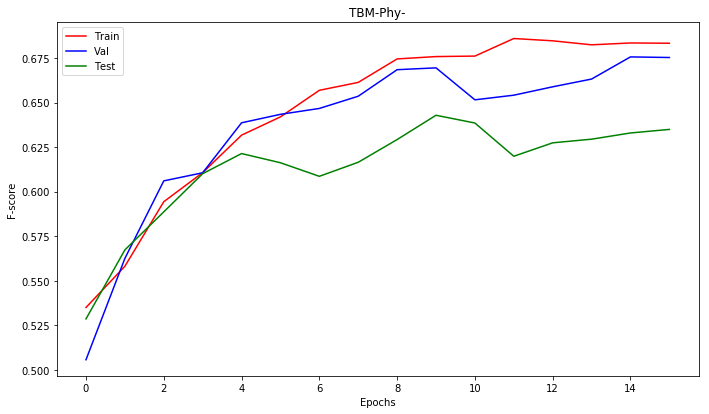

  0%|          | 2/2517 [00:00<02:15, 18.57it/s]

==========Epoch14========
TRAIN: (0.6985537446741371, 0.7059992054032579, 0.6834295079398907)
VAL: (0.6807629551865017, 0.6888888888888889, 0.6756152023332119)
TEST: (0.6318343578423423, 0.6454891994917408, 0.6329413912475516)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.667283     0.716599    0.635838    0.708972    0.540179   
Recall       0.391965     0.887218    0.452675    0.837209    0.407407   
F-score      0.493844     0.792833    0.528846    0.767773    0.464491   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.687389  
Recall       0.789796  
F-score      0.735043  
Count      490.000000  
=#==#==#==#==#=16=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.72it/s]


==========Epoch No:16==========
Training Loss: 1420.60892293
Train: (0.7041225206945497, 0.7123559793404847, 0.6956817402574972, None)
                    0            1
Precision    0.662273     0.728272
Recall       0.436482     0.871554
F-score      0.526178     0.793497
Count      921.000000  1596.000000
--------
Val: (0.673680727230257, 0.6825396825396826, 0.6705894519465535, None)
                    0           1
Precision    0.620112    0.707317
Recall       0.456790    0.824289
F-score      0.526066    0.761337
Count      243.000000  387.000000
--------
Test: (0.6336461441149964, 0.6467598475222364, 0.6349402342777514, None)
                    0           1
Precision    0.541850    0.689286
Recall       0.414141    0.787755
F-score      0.469466    0.735238
Count      297.000000  490.000000




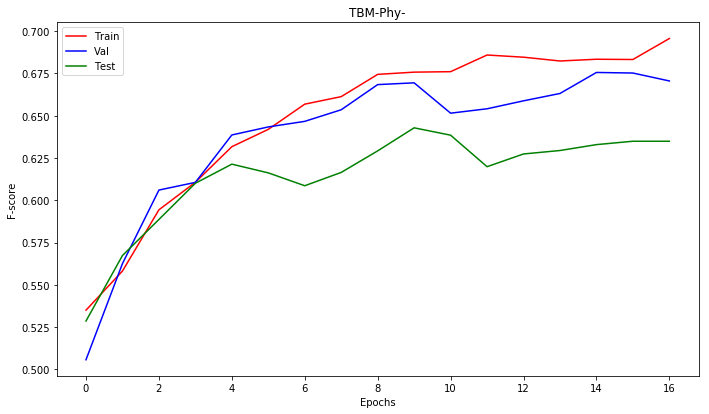

  0%|          | 2/2517 [00:00<02:13, 18.77it/s]

==========Epoch14========
TRAIN: (0.6985537446741371, 0.7059992054032579, 0.6834295079398907)
VAL: (0.6807629551865017, 0.6888888888888889, 0.6756152023332119)
TEST: (0.6318343578423423, 0.6454891994917408, 0.6329413912475516)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.667283     0.716599    0.635838    0.708972    0.540179   
Recall       0.391965     0.887218    0.452675    0.837209    0.407407   
F-score      0.493844     0.792833    0.528846    0.767773    0.464491   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.687389  
Recall       0.789796  
F-score      0.735043  
Count      490.000000  
=#==#==#==#==#=17=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.69it/s]


==========Epoch No:17==========
Training Loss: 1415.73311216
Train: (0.7033222568707591, 0.7115613825983313, 0.6943800318211402, None)
                    0            1
Precision    0.662230     0.727035
Recall       0.432139     0.872807
F-score      0.522996     0.793280
Count      921.000000  1596.000000
--------
Val: (0.6729591836734694, 0.680952380952381, 0.6730058229845977, None)
                    0           1
Precision    0.607143    0.714286
Recall       0.489712    0.801034
F-score      0.542141    0.755177
Count      243.000000  387.000000
--------
Test: (0.641162993765186, 0.6518424396442185, 0.6431323791068339, None)
                    0           1
Precision    0.547718    0.697802
Recall       0.444444    0.777551
F-score      0.490706    0.735521
Count      297.000000  490.000000




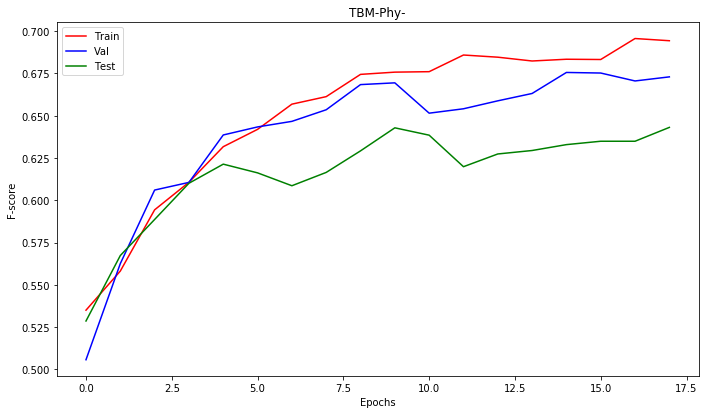

  0%|          | 3/2517 [00:00<01:44, 23.99it/s]

==========Epoch14========
TRAIN: (0.6985537446741371, 0.7059992054032579, 0.6834295079398907)
VAL: (0.6807629551865017, 0.6888888888888889, 0.6756152023332119)
TEST: (0.6318343578423423, 0.6454891994917408, 0.6329413912475516)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.667283     0.716599    0.635838    0.708972    0.540179   
Recall       0.391965     0.887218    0.452675    0.837209    0.407407   
F-score      0.493844     0.792833    0.528846    0.767773    0.464491   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.687389  
Recall       0.789796  
F-score      0.735043  
Count      490.000000  
=#==#==#==#==#=18=#==#==#==#==#=


100%|██████████| 2517/2517 [01:54<00:00, 21.95it/s]


==========Epoch No:18==========
Training Loss: 1414.73707815
Train: (0.7022379725064786, 0.7103694874851013, 0.6920926640093504, None)
                    0            1
Precision    0.663265     0.724728
Recall       0.423453     0.875940
F-score      0.516899     0.793191
Count      921.000000  1596.000000
--------
Val: (0.6838087347615103, 0.6904761904761905, 0.6843974767647963, None)
                    0           1
Precision    0.617647    0.725352
Recall       0.518519    0.798450
F-score      0.563758    0.760148
Count      243.000000  387.000000
--------
Test: (0.6390888040301713, 0.6493011435832274, 0.641313387514065, None)
                    0           1
Precision    0.542857    0.697417
Recall       0.447811    0.771429
F-score      0.490775    0.732558
Count      297.000000  490.000000




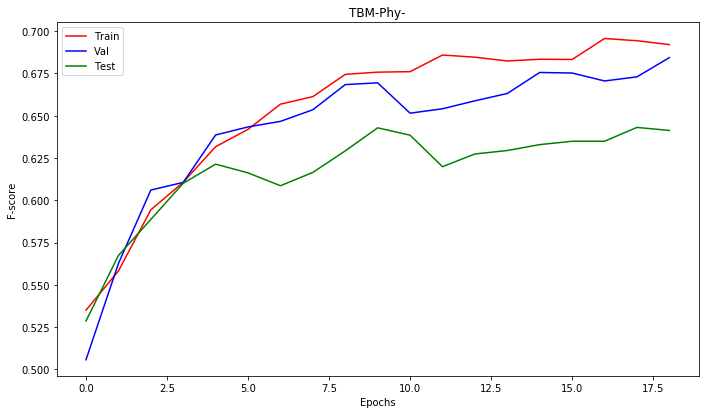

  0%|          | 3/2517 [00:00<01:42, 24.55it/s]

==========Epoch18========
TRAIN: (0.7022379725064786, 0.7103694874851013, 0.6920926640093504)
VAL: (0.6838087347615103, 0.6904761904761905, 0.6843974767647963)
TEST: (0.6390888040301713, 0.6493011435832274, 0.641313387514065)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.663265     0.724728    0.617647    0.725352    0.542857   
Recall       0.423453     0.875940    0.518519    0.798450    0.447811   
F-score      0.516899     0.793191    0.563758    0.760148    0.490775   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.697417  
Recall       0.771429  
F-score      0.732558  
Count      490.000000  
=#==#==#==#==#=19=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.67it/s]


==========Epoch No:19==========
Training Loss: 1408.64892638
Train: (0.7098460717541262, 0.7167262614223282, 0.6988505753616828, None)
                    0            1
Precision    0.676871     0.728875
Recall       0.432139     0.880952
F-score      0.527502     0.797730
Count      921.000000  1596.000000
--------
Val: (0.6789614121510673, 0.6873015873015873, 0.6742281213158604, None)
                    0           1
Precision    0.632184    0.708333
Recall       0.452675    0.834625
F-score      0.527578    0.766311
Count      243.000000  387.000000
--------
Test: (0.6428676056950764, 0.6569250317662008, 0.6412266005540697, None)
                    0           1
Precision    0.564593    0.690311
Recall       0.397306    0.814286
F-score      0.466403    0.747191
Count      297.000000  490.000000




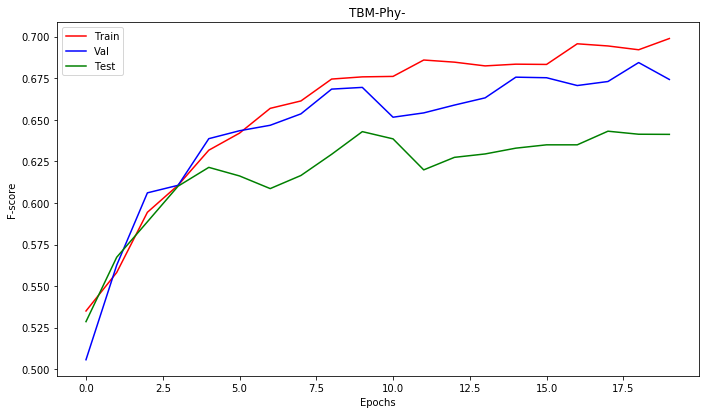

  0%|          | 3/2517 [00:00<02:02, 20.46it/s]

==========Epoch18========
TRAIN: (0.7022379725064786, 0.7103694874851013, 0.6920926640093504)
VAL: (0.6838087347615103, 0.6904761904761905, 0.6843974767647963)
TEST: (0.6390888040301713, 0.6493011435832274, 0.641313387514065)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.663265     0.724728    0.617647    0.725352    0.542857   
Recall       0.423453     0.875940    0.518519    0.798450    0.447811   
F-score      0.516899     0.793191    0.563758    0.760148    0.490775   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.697417  
Recall       0.771429  
F-score      0.732558  
Count      490.000000  
=#==#==#==#==#=20=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.79it/s]


==========Epoch No:20==========
Training Loss: 1403.11132744
Train: (0.7110975984776469, 0.7175208581644815, 0.699066024192344, None)
                    0            1
Precision    0.681034     0.728446
Recall       0.428882     0.884085
F-score      0.526316     0.798755
Count      921.000000  1596.000000
--------
Val: (0.6779537703675635, 0.6857142857142857, 0.6776693759195508, None)
                    0           1
Precision    0.615385    0.717241
Recall       0.493827    0.806202
F-score      0.547945    0.759124
Count      243.000000  387.000000
--------
Test: (0.6452345475226281, 0.6569250317662008, 0.646306435115561, None)
                    0           1
Precision    0.558442    0.697842
Recall       0.434343    0.791837
F-score      0.488636    0.741874
Count      297.000000  490.000000




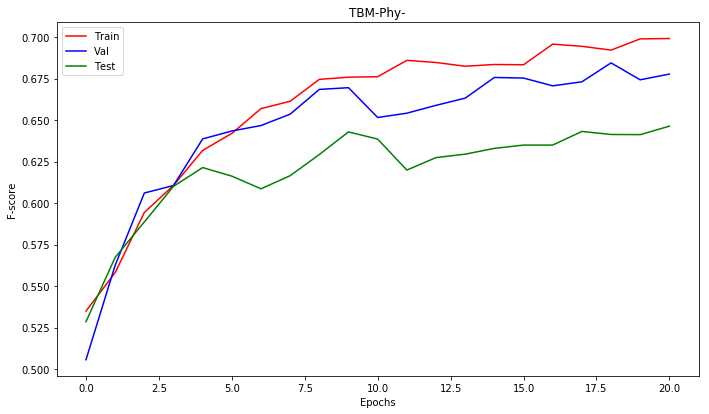

  0%|          | 3/2517 [00:00<01:34, 26.47it/s]

==========Epoch18========
TRAIN: (0.7022379725064786, 0.7103694874851013, 0.6920926640093504)
VAL: (0.6838087347615103, 0.6904761904761905, 0.6843974767647963)
TEST: (0.6390888040301713, 0.6493011435832274, 0.641313387514065)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.663265     0.724728    0.617647    0.725352    0.542857   
Recall       0.423453     0.875940    0.518519    0.798450    0.447811   
F-score      0.516899     0.793191    0.563758    0.760148    0.490775   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.697417  
Recall       0.771429  
F-score      0.732558  
Count      490.000000  
=#==#==#==#==#=21=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.63it/s]


==========Epoch No:21==========
Training Loss: 1396.18486089
Train: (0.7129604542095719, 0.7183154549066348, 0.6982947340264023, None)
                    0            1
Precision    0.689286     0.726622
Recall       0.419110     0.890977
F-score      0.521269     0.800450
Count      921.000000  1596.000000
--------
Val: (0.6867857142857143, 0.6936507936507936, 0.686844651131214, None)
                    0           1
Precision    0.625000    0.725581
Recall       0.514403    0.806202
F-score      0.564334    0.763770
Count      243.000000  387.000000
--------
Test: (0.6507415595931314, 0.662007623888183, 0.6515463397805157, None)
                    0           1
Precision    0.567100    0.701439
Recall       0.441077    0.795918
F-score      0.496212    0.745698
Count      297.000000  490.000000




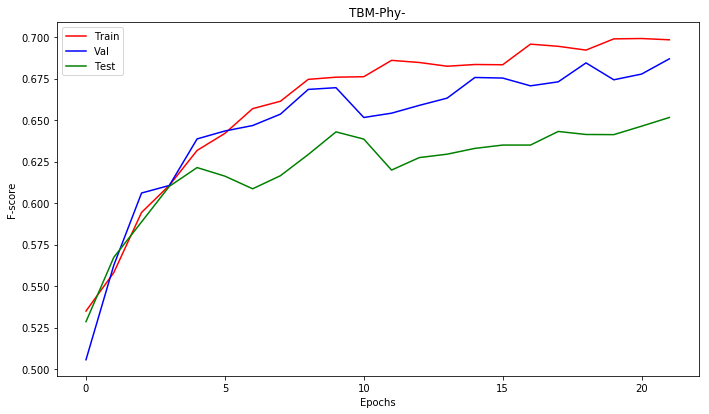

  0%|          | 3/2517 [00:00<01:37, 25.87it/s]

==========Epoch21========
TRAIN: (0.7129604542095719, 0.7183154549066348, 0.6982947340264023)
VAL: (0.6867857142857143, 0.6936507936507936, 0.686844651131214)
TEST: (0.6507415595931314, 0.662007623888183, 0.6515463397805157)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.689286     0.726622    0.625000    0.725581    0.567100   
Recall       0.419110     0.890977    0.514403    0.806202    0.441077   
F-score      0.521269     0.800450    0.564334    0.763770    0.496212   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.701439  
Recall       0.795918  
F-score      0.745698  
Count      490.000000  
=#==#==#==#==#=22=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.72it/s]


==========Epoch No:22==========
Training Loss: 1388.21698651
Train: (0.7108694390989835, 0.7175208581644815, 0.6995390295521693, None)
                    0            1
Precision    0.679181     0.729156
Recall       0.432139     0.882206
F-score      0.528202     0.798412
Count      921.000000  1596.000000
--------
Val: (0.6877326269197709, 0.6952380952380952, 0.6842569545647996, None)
                    0           1
Precision    0.640884    0.717149
Recall       0.477366    0.832041
F-score      0.547170    0.770335
Count      243.000000  387.000000
--------
Test: (0.6532769428205601, 0.6645489199491741, 0.6537487251752392, None)
                    0           1
Precision    0.572052    0.702509
Recall       0.441077    0.800000
F-score      0.498099    0.748092
Count      297.000000  490.000000




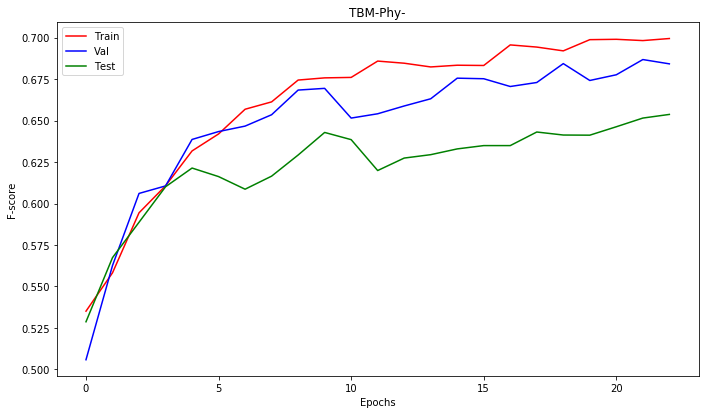

  0%|          | 3/2517 [00:00<01:25, 29.52it/s]

==========Epoch21========
TRAIN: (0.7129604542095719, 0.7183154549066348, 0.6982947340264023)
VAL: (0.6867857142857143, 0.6936507936507936, 0.686844651131214)
TEST: (0.6507415595931314, 0.662007623888183, 0.6515463397805157)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.689286     0.726622    0.625000    0.725581    0.567100   
Recall       0.419110     0.890977    0.514403    0.806202    0.441077   
F-score      0.521269     0.800450    0.564334    0.763770    0.496212   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.701439  
Recall       0.795918  
F-score      0.745698  
Count      490.000000  
=#==#==#==#==#=23=#==#==#==#==#=


100%|██████████| 2517/2517 [02:04<00:00, 20.27it/s]


==========Epoch No:23==========
Training Loss: 1385.96306887
Train: (0.7190220233029697, 0.7246722288438617, 0.707900592738349, None)
                    0            1
Precision    0.691275     0.735034
Recall       0.447340     0.884712
F-score      0.543177     0.802957
Count      921.000000  1596.000000
--------
Val: (0.6929598953792503, 0.7, 0.6903587387341901, None)
                    0           1
Precision    0.645161    0.722973
Recall       0.493827    0.829457
F-score      0.559441    0.772563
Count      243.000000  387.000000
--------
Test: (0.6407101823040757, 0.6531130876747141, 0.6417262401536891, None)
                    0           1
Precision    0.552632    0.694097
Recall       0.424242    0.791837
F-score      0.480000    0.739752
Count      297.000000  490.000000




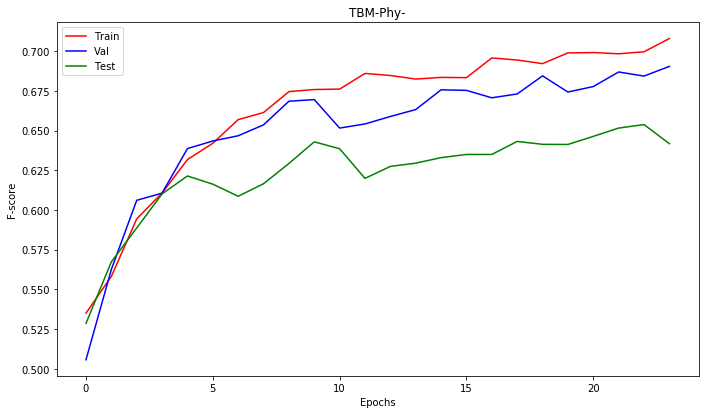

  0%|          | 3/2517 [00:00<01:27, 28.77it/s]

==========Epoch23========
TRAIN: (0.7190220233029697, 0.7246722288438617, 0.707900592738349)
VAL: (0.6929598953792503, 0.7, 0.6903587387341901)
TEST: (0.6407101823040757, 0.6531130876747141, 0.6417262401536891)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.691275     0.735034    0.645161    0.722973    0.552632   
Recall       0.447340     0.884712    0.493827    0.829457    0.424242   
F-score      0.543177     0.802957    0.559441    0.772563    0.480000   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.694097  
Recall       0.791837  
F-score      0.739752  
Count      490.000000  
=#==#==#==#==#=24=#==#==#==#==#=


100%|██████████| 2517/2517 [02:00<00:00, 20.86it/s]


==========Epoch No:24==========
Training Loss: 1377.29785469
Train: (0.7251153643054967, 0.7302344060389352, 0.7146678573937885, None)
                    0            1
Precision    0.699013     0.740178
Recall       0.461455     0.885338
F-score      0.555919     0.806277
Count      921.000000  1596.000000
--------
Val: (0.6981814752526602, 0.7047619047619048, 0.6945905649725692, None)
                    0           1
Precision    0.655738    0.724832
Recall       0.493827    0.837209
F-score      0.563380    0.776978
Count      243.000000  387.000000
--------
Test: (0.6381490465521773, 0.6493011435832274, 0.6401247100864854, None)
                    0           1
Precision    0.543933    0.695255
Recall       0.437710    0.777551
F-score      0.485075    0.734104
Count      297.000000  490.000000




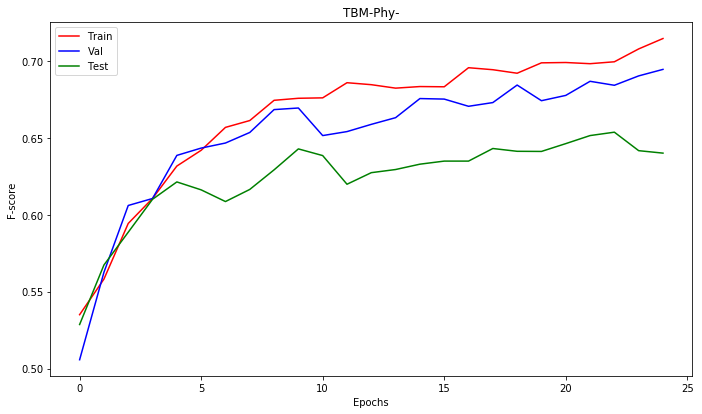

  0%|          | 3/2517 [00:00<01:32, 27.15it/s]

==========Epoch24========
TRAIN: (0.7251153643054967, 0.7302344060389352, 0.7146678573937885)
VAL: (0.6981814752526602, 0.7047619047619048, 0.6945905649725692)
TEST: (0.6381490465521773, 0.6493011435832274, 0.6401247100864854)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.699013     0.740178    0.655738    0.724832    0.543933   
Recall       0.461455     0.885338    0.493827    0.837209    0.437710   
F-score      0.555919     0.806277    0.563380    0.776978    0.485075   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.695255  
Recall       0.777551  
F-score      0.734104  
Count      490.000000  
=#==#==#==#==#=25=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.57it/s]


==========Epoch No:25==========
Training Loss: 1382.132531
Train: (0.7127529433009615, 0.7203019467620183, 0.7062356696260653, None)
                    0            1
Precision    0.670330     0.737234
Recall       0.463626     0.868421
F-score      0.548139     0.797468
Count      921.000000  1596.000000
--------
Val: (0.6946995059438673, 0.7015873015873015, 0.6913065925529194, None)
                    0           1
Precision    0.650273    0.722595
Recall       0.489712    0.834625
F-score      0.558685    0.774580
Count      243.000000  387.000000
--------
Test: (0.6472495955865296, 0.6581956797966964, 0.6486509604976567, None)
                    0           1
Precision    0.559322    0.700544
Recall       0.444444    0.787755
F-score      0.495310    0.741595
Count      297.000000  490.000000




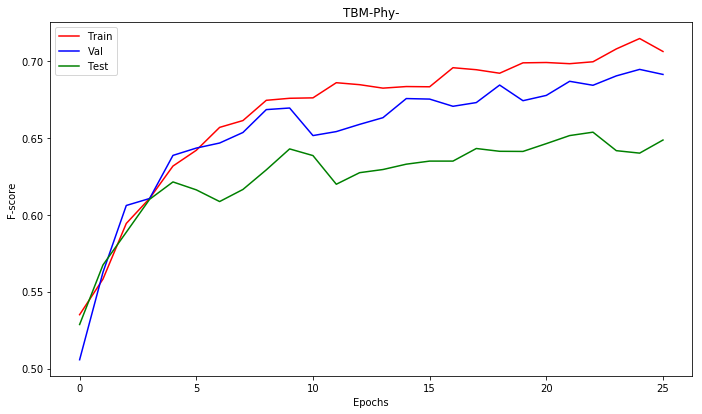

  0%|          | 3/2517 [00:00<01:34, 26.62it/s]

==========Epoch24========
TRAIN: (0.7251153643054967, 0.7302344060389352, 0.7146678573937885)
VAL: (0.6981814752526602, 0.7047619047619048, 0.6945905649725692)
TEST: (0.6381490465521773, 0.6493011435832274, 0.6401247100864854)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.699013     0.740178    0.655738    0.724832    0.543933   
Recall       0.461455     0.885338    0.493827    0.837209    0.437710   
F-score      0.555919     0.806277    0.563380    0.776978    0.485075   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.695255  
Recall       0.777551  
F-score      0.734104  
Count      490.000000  
=#==#==#==#==#=26=#==#==#==#==#=


100%|██████████| 2517/2517 [01:50<00:00, 22.87it/s]


==========Epoch No:26==========
Training Loss: 1379.59196141
Train: (0.7211682387843549, 0.7262614223281685, 0.7091382245345199, None)
                    0            1
Precision    0.696610     0.735340
Recall       0.446254     0.887845
F-score      0.544011     0.804428
Count      921.000000  1596.000000
--------
Val: (0.6827458256029685, 0.6904761904761905, 0.6759065133365512, None)
                    0           1
Precision    0.642857    0.707792
Recall       0.444444    0.844961
F-score      0.525547    0.770318
Count      243.000000  387.000000
--------
Test: (0.6472710639247011, 0.6607369758576874, 0.645459857819303, None)
                    0           1
Precision    0.571429    0.693241
Recall       0.404040    0.816327
F-score      0.473373    0.749766
Count      297.000000  490.000000




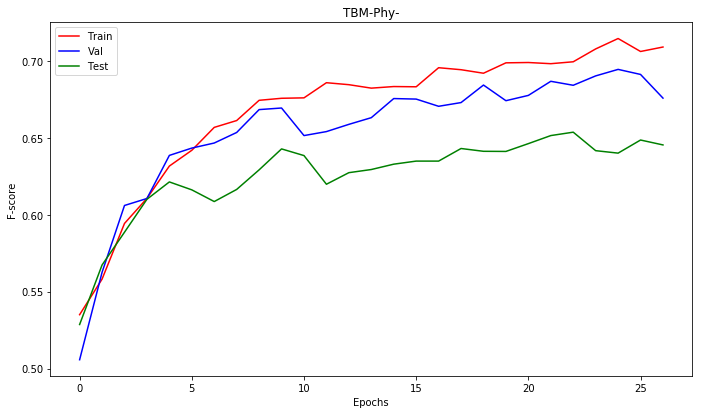

  0%|          | 3/2517 [00:00<01:29, 27.95it/s]

==========Epoch24========
TRAIN: (0.7251153643054967, 0.7302344060389352, 0.7146678573937885)
VAL: (0.6981814752526602, 0.7047619047619048, 0.6945905649725692)
TEST: (0.6381490465521773, 0.6493011435832274, 0.6401247100864854)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.699013     0.740178    0.655738    0.724832    0.543933   
Recall       0.461455     0.885338    0.493827    0.837209    0.437710   
F-score      0.555919     0.806277    0.563380    0.776978    0.485075   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.695255  
Recall       0.777551  
F-score      0.734104  
Count      490.000000  
=#==#==#==#==#=27=#==#==#==#==#=


100%|██████████| 2517/2517 [01:48<00:00, 23.25it/s]


==========Epoch No:27==========
Training Loss: 1366.35672341
Train: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287, None)
                    0            1
Precision    0.694006     0.744557
Recall       0.477742     0.878446
F-score      0.565916     0.805979
Count      921.000000  1596.000000
--------
Val: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431, None)
                    0           1
Precision    0.656250    0.732877
Recall       0.518519    0.829457
F-score      0.579310    0.778182
Count      243.000000  387.000000
--------
Test: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049, None)
                    0           1
Precision    0.549180    0.699816
Recall       0.451178    0.775510
F-score      0.495379    0.735721
Count      297.000000  490.000000




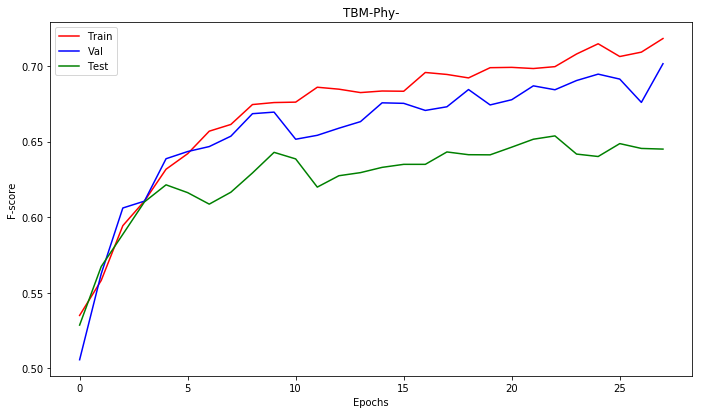

  0%|          | 2/2517 [00:00<02:20, 17.94it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=28=#==#==#==#==#=


100%|██████████| 2517/2517 [01:48<00:00, 23.21it/s]


==========Epoch No:28==========
Training Loss: 1364.56629513
Train: (0.7234903106321654, 0.7294398092967819, 0.715224619133274, None)
                    0            1
Precision    0.691083     0.742192
Recall       0.471227     0.878446
F-score      0.560362     0.804591
Count      921.000000  1596.000000
--------
Val: (0.6983780126509989, 0.7047619047619048, 0.6976100728539752, None)
                    0           1
Precision    0.644670    0.732102
Recall       0.522634    0.819121
F-score      0.577273    0.773171
Count      243.000000  387.000000
--------
Test: (0.6402841267732945, 0.6518424396442185, 0.641912917489699, None)
                    0           1
Precision    0.548936    0.695652
Recall       0.434343    0.783673
F-score      0.484962    0.737044
Count      297.000000  490.000000




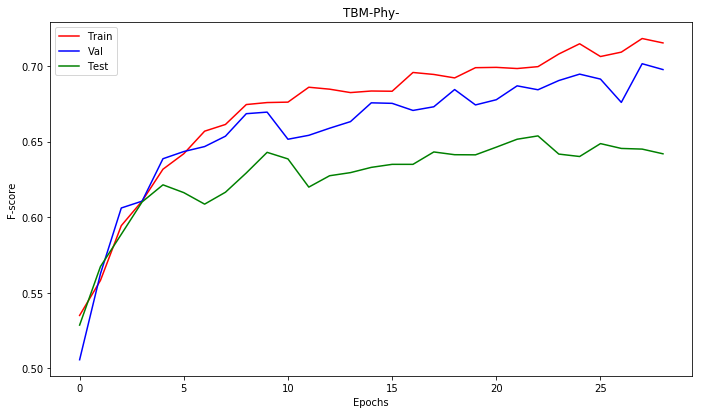

  0%|          | 3/2517 [00:00<01:33, 27.02it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=29=#==#==#==#==#=


100%|██████████| 2517/2517 [01:48<00:00, 23.17it/s]


==========Epoch No:29==========
Training Loss: 1359.13139623
Train: (0.7253269828503031, 0.7310290027810886, 0.7168973085950461, None)
                    0            1
Precision    0.694268     0.743250
Recall       0.473398     0.879699
F-score      0.562944     0.805739
Count      921.000000  1596.000000
--------
Val: (0.6912860382248137, 0.6984126984126984, 0.6893978605935127, None)
                    0           1
Precision    0.640212    0.723356
Recall       0.497942    0.824289
F-score      0.560185    0.770531
Count      243.000000  387.000000
--------
Test: (0.6512193793611184, 0.662007623888183, 0.65236801478927, None)
                    0           1
Precision    0.565957    0.702899
Recall       0.447811    0.791837
F-score      0.500000    0.744722
Count      297.000000  490.000000




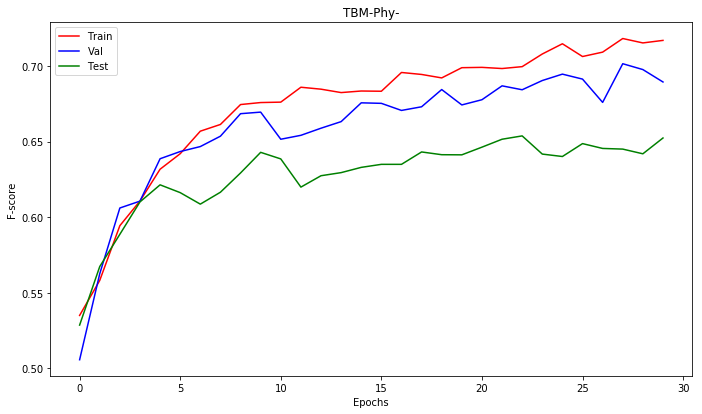

  0%|          | 3/2517 [00:00<01:32, 27.05it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=30=#==#==#==#==#=


100%|██████████| 2517/2517 [02:00<00:00, 20.90it/s]


==========Epoch No:30==========
Training Loss: 1357.14242852
Train: (0.7248522923299343, 0.7298371076678586, 0.713888969771019, None)
                    0            1
Precision    0.699834     0.739289
Recall       0.458198     0.886591
F-score      0.553806     0.806268
Count      921.000000  1596.000000
--------
Val: (0.6904742178561566, 0.6968253968253968, 0.6908713746773134, None)
                    0           1
Precision    0.627451    0.730047
Recall       0.526749    0.803618
F-score      0.572707    0.765068
Count      243.000000  387.000000
--------
Test: (0.649978651205689, 0.6607369758576874, 0.6512632210144027, None)
                    0           1
Precision    0.563559    0.702359
Recall       0.447811    0.789796
F-score      0.499062    0.743516
Count      297.000000  490.000000




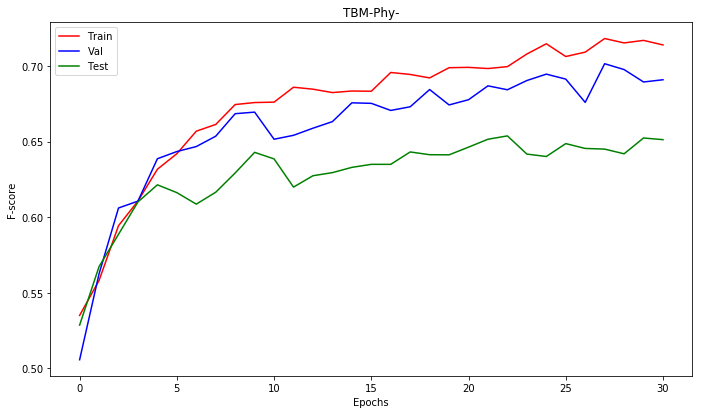

  0%|          | 3/2517 [00:00<01:47, 23.49it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=31=#==#==#==#==#=


100%|██████████| 2517/2517 [01:55<00:00, 21.70it/s]


==========Epoch No:31==========
Training Loss: 1348.43638778
Train: (0.7307986083610379, 0.735399284862932, 0.7207532680076605, None)
                    0            1
Precision    0.706645     0.744737
Recall       0.473398     0.886591
F-score      0.566970     0.809497
Count      921.000000  1596.000000
--------
Val: (0.6820387397468881, 0.6888888888888889, 0.682581725631053, None)
                    0           1
Precision    0.615764    0.723653
Recall       0.514403    0.798450
F-score      0.560538    0.759214
Count      243.000000  387.000000
--------
Test: (0.6564350115301248, 0.6658195679796697, 0.6580231627126656, None)
                    0           1
Precision    0.569672    0.709024
Recall       0.468013    0.785714
F-score      0.513863    0.745402
Count      297.000000  490.000000




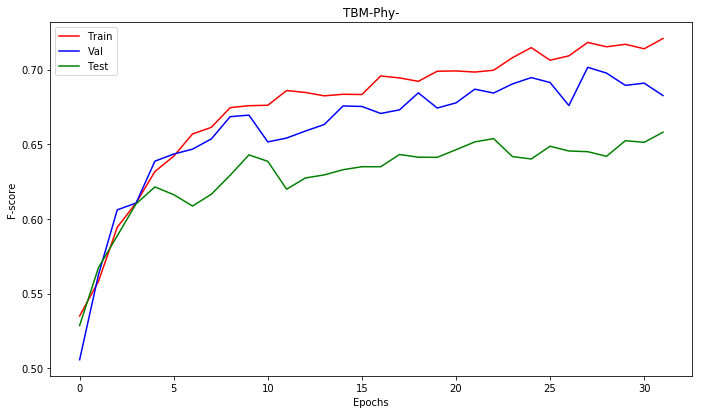

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=32=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.17it/s]


==========Epoch No:32==========
Training Loss: 1351.22620893
Train: (0.7215600945738139, 0.7282479141835518, 0.715507344322173, None)
                    0            1
Precision    0.682028     0.744373
Recall       0.482085     0.870301
F-score      0.564885     0.802426
Count      921.000000  1596.000000
--------
Val: (0.6913237209662234, 0.6968253968253968, 0.6923349941983483, None)
                    0           1
Precision    0.622642    0.734450
Recall       0.543210    0.793282
F-score      0.580220    0.762733
Count      243.000000  387.000000
--------
Test: (0.6369468790143302, 0.6480304955527318, 0.6390237714607576, None)
                    0           1
Precision    0.541667    0.694698
Recall       0.437710    0.775510
F-score      0.484171    0.732883
Count      297.000000  490.000000




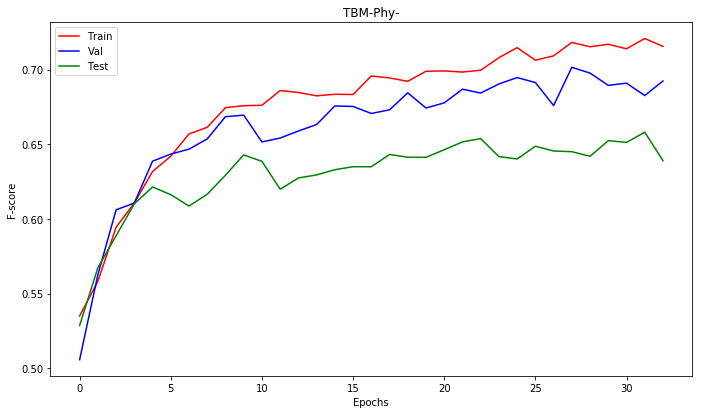

  0%|          | 3/2517 [00:00<01:39, 25.30it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=33=#==#==#==#==#=


100%|██████████| 2517/2517 [01:52<00:00, 22.29it/s]


==========Epoch No:33==========
Training Loss: 1343.79751505
Train: (0.7295788853896016, 0.735399284862932, 0.7232463527590673, None)
                    0            1
Precision    0.694656     0.749731
Recall       0.494028     0.874687
F-score      0.577411     0.807403
Count      921.000000  1596.000000
--------
Val: (0.6952460474848534, 0.7015873015873015, 0.695152926035279, None)
                    0           1
Precision    0.636816    0.731935
Recall       0.526749    0.811370
F-score      0.576577    0.769608
Count      243.000000  387.000000
--------
Test: (0.6438692212653945, 0.6543837357052097, 0.6457372522520395, None)
                    0           1
Precision    0.551867    0.699634
Recall       0.447811    0.779592
F-score      0.494424    0.737452
Count      297.000000  490.000000




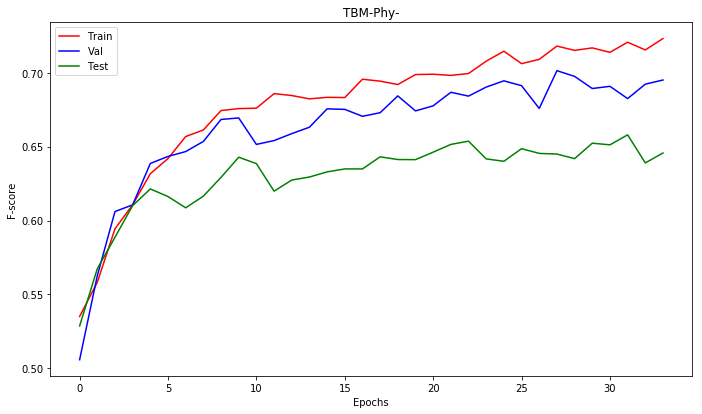

  0%|          | 3/2517 [00:00<01:28, 28.51it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=34=#==#==#==#==#=


100%|██████████| 2517/2517 [01:52<00:00, 22.36it/s]


==========Epoch No:34==========
Training Loss: 1341.48254566
Train: (0.7302621651139313, 0.7357965832340088, 0.7230916645209656, None)
                    0            1
Precision    0.698142     0.748797
Recall       0.489685     0.877820
F-score      0.575622     0.808192
Count      921.000000  1596.000000
--------
Val: (0.6880168431892979, 0.6952380952380952, 0.6870096323913016, None)
                    0           1
Precision    0.632124    0.723112
Recall       0.502058    0.816537
F-score      0.559633    0.766990
Count      243.000000  387.000000
--------
Test: (0.6432956135592329, 0.6543837357052097, 0.6449367915752849, None)
                    0           1
Precision    0.552743    0.698182
Recall       0.441077    0.783673
F-score      0.490637    0.738462
Count      297.000000  490.000000




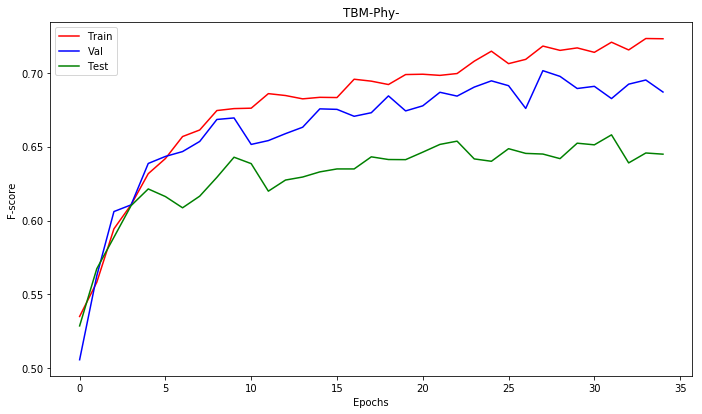

  0%|          | 3/2517 [00:00<01:27, 28.72it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=35=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.59it/s]


==========Epoch No:35==========
Training Loss: 1335.6526178
Train: (0.7324385236963907, 0.7377830750893921, 0.7253636335567996, None)
                    0            1
Precision    0.701079     0.750535
Recall       0.494028     0.878446
F-score      0.579618     0.809469
Count      921.000000  1596.000000
--------
Val: (0.6797258534750306, 0.6873015873015873, 0.6795131697908743, None)
                    0           1
Precision    0.617347    0.718894
Recall       0.497942    0.806202
F-score      0.551253    0.760049
Count      243.000000  387.000000
--------
Test: (0.6656311122495088, 0.6759847522236341, 0.6653486858578415, None)
                    0           1
Precision    0.592105    0.710197
Recall       0.454545    0.810204
F-score      0.514286    0.756911
Count      297.000000  490.000000




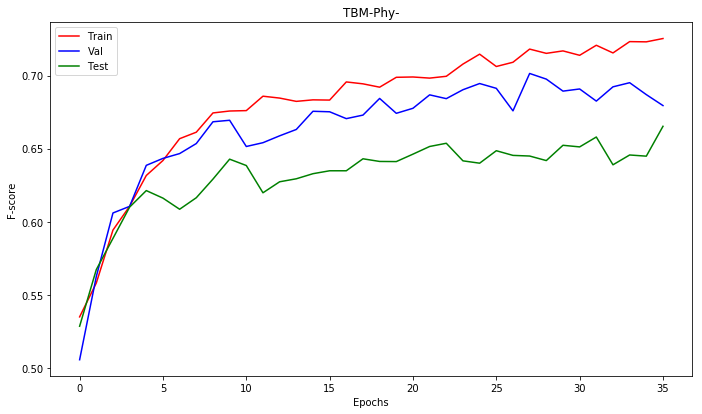

  0%|          | 4/2517 [00:00<01:40, 24.96it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=36=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.33it/s]


==========Epoch No:36==========
Training Loss: 1329.65582883
Train: (0.7344970446568384, 0.7393722685736989, 0.7265217314463539, None)
                    0            1
Precision    0.706708     0.750533
Recall       0.491857     0.882206
F-score      0.580026     0.811060
Count      921.000000  1596.000000
--------
Val: (0.67692170418644, 0.6841269841269841, 0.6775208027651676, None)
                    0           1
Precision    0.608911    0.719626
Recall       0.506173    0.795866
F-score      0.552809    0.755828
Count      243.000000  387.000000
--------
Test: (0.6516230572313289, 0.6607369758576874, 0.6535633933463341, None)
                    0           1
Precision    0.560484    0.706865
Recall       0.468013    0.777551
F-score      0.510092    0.740525
Count      297.000000  490.000000




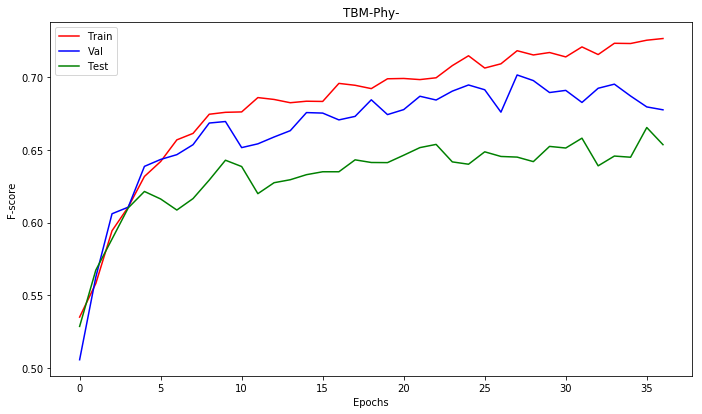

  0%|          | 3/2517 [00:00<01:49, 22.97it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=37=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.58it/s]


==========Epoch No:37==========
Training Loss: 1324.64153434
Train: (0.7377875342491056, 0.7421533571712357, 0.7292497093387148, None)
                    0            1
Precision    0.713166     0.751996
Recall       0.494028     0.885338
F-score      0.583708     0.813237
Count      921.000000  1596.000000
--------
Val: (0.6910884353741495, 0.6968253968253968, 0.6919813505056864, None)
                    0           1
Precision    0.623810    0.733333
Recall       0.539095    0.795866
F-score      0.578366    0.763321
Count      243.000000  387.000000
--------
Test: (0.6604954361621237, 0.6683608640406608, 0.6623902499581779, None)
                    0           1
Precision    0.570866    0.714822
Recall       0.488215    0.777551
F-score      0.526316    0.744868
Count      297.000000  490.000000




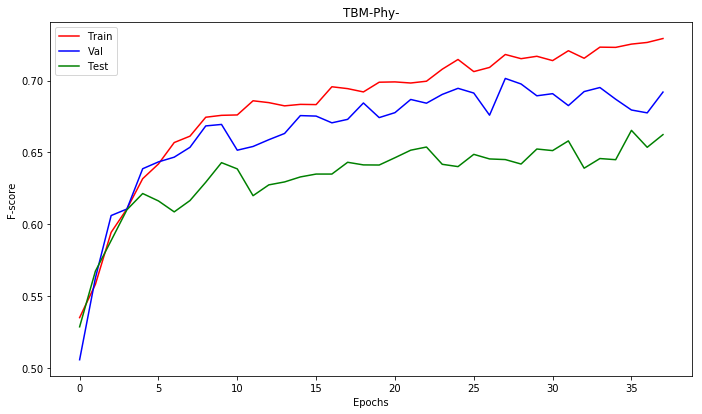

  0%|          | 3/2517 [00:00<01:30, 27.78it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=38=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.28it/s]


==========Epoch No:38==========
Training Loss: 1323.24744266
Train: (0.7327331208944576, 0.7385776718315455, 0.7277832681369151, None)
                    0            1
Precision    0.694815     0.754615
Recall       0.509229     0.870927
F-score      0.587719     0.808610
Count      921.000000  1596.000000
--------
Val: (0.6867934195252773, 0.692063492063492, 0.6880260359705851, None)
                    0           1
Precision    0.613953    0.732530
Recall       0.543210    0.785530
F-score      0.576419    0.758105
Count      243.000000  387.000000
--------
Test: (0.6519067680004894, 0.6569250317662008, 0.653802898484308, None)
                    0           1
Precision    0.549451    0.714008
Recall       0.505051    0.748980
F-score      0.526316    0.731076
Count      297.000000  490.000000




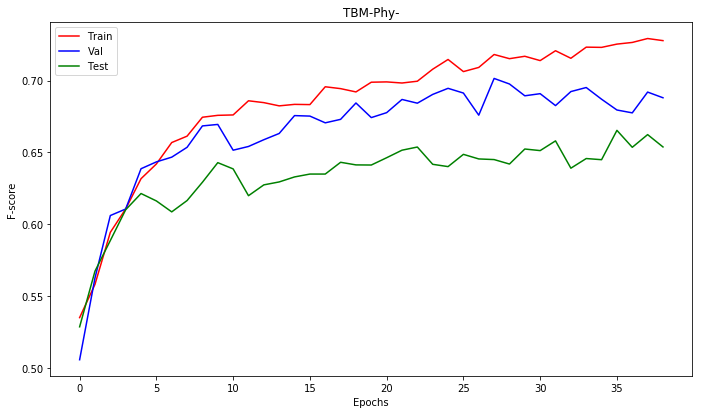

  0%|          | 3/2517 [00:00<01:41, 24.85it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=39=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.52it/s]


==========Epoch No:39==========
Training Loss: 1317.3306441
Train: (0.7329729583463521, 0.7389749702026222, 0.7289540569266513, None)
                    0            1
Precision    0.691860     0.756698
Recall       0.516830     0.867168
F-score      0.591672     0.808175
Count      921.000000  1596.000000
--------
Val: (0.6832611832611833, 0.6904761904761905, 0.6831875607385812, None)
                    0           1
Precision    0.621212    0.722222
Recall       0.506173    0.806202
F-score      0.557823    0.761905
Count      243.000000  387.000000
--------
Test: (0.6522237188763331, 0.6607369758576874, 0.6542799906720921, None)
                    0           1
Precision    0.559524    0.708411
Recall       0.474747    0.773469
F-score      0.513661    0.739512
Count      297.000000  490.000000




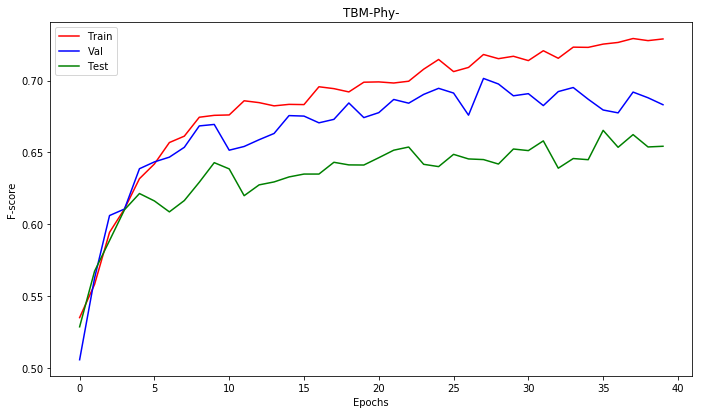

  0%|          | 3/2517 [00:00<01:35, 26.34it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=40=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.49it/s]


==========Epoch No:40==========
Training Loss: 1319.11404154
Train: (0.7334970664746284, 0.7389749702026222, 0.7272942381458181, None)
                    0            1
Precision    0.700000     0.752827
Recall       0.501629     0.875940
F-score      0.584440     0.809731
Count      921.000000  1596.000000
--------
Val: (0.6847341164582543, 0.692063492063492, 0.6841811056989539, None)
                    0           1
Precision    0.625641    0.721839
Recall       0.502058    0.811370
F-score      0.557078    0.763990
Count      243.000000  387.000000
--------
Test: (0.6522576840986288, 0.662007623888183, 0.6539337247682973, None)
                    0           1
Precision    0.563786    0.705882
Recall       0.461279    0.783673
F-score      0.507407    0.742747
Count      297.000000  490.000000




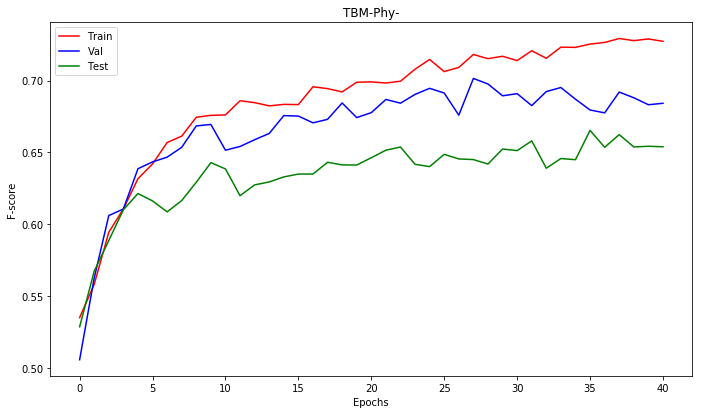

  0%|          | 3/2517 [00:00<01:31, 27.39it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=41=#==#==#==#==#=


100%|██████████| 2517/2517 [01:52<00:00, 22.40it/s]


==========Epoch No:41==========
Training Loss: 1311.71220572
Train: (0.7388161980604511, 0.7437425506555423, 0.732395127111977, None)
                    0            1
Precision    0.708459     0.756334
Recall       0.509229     0.879073
F-score      0.592546     0.813098
Count      921.000000  1596.000000
--------
Val: (0.6851934135516226, 0.692063492063492, 0.6854237641002346, None)
                    0           1
Precision    0.621891    0.724942
Recall       0.514403    0.803618
F-score      0.563063    0.762255
Count      243.000000  387.000000
--------
Test: (0.6516892641015951, 0.6594663278271918, 0.65384982427964, None)
                    0           1
Precision    0.556420    0.709434
Recall       0.481481    0.767347
F-score      0.516245    0.737255
Count      297.000000  490.000000




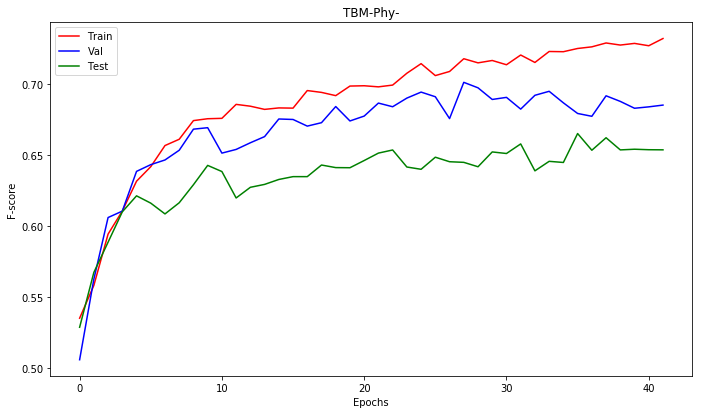

  0%|          | 3/2517 [00:00<01:51, 22.54it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=42=#==#==#==#==#=


100%|██████████| 2517/2517 [01:53<00:00, 22.22it/s]


==========Epoch No:42==========
Training Loss: 1309.71642151
Train: (0.7428114311414098, 0.7473182359952324, 0.736188087016195, None)
                    0            1
Precision    0.714932     0.758900
Recall       0.514658     0.881579
F-score      0.598485     0.815652
Count      921.000000  1596.000000
--------
Val: (0.6913448154250071, 0.6984126984126984, 0.6898383191439507, None)
                    0           1
Precision    0.638743    0.724374
Recall       0.502058    0.821705
F-score      0.562212    0.769976
Count      243.000000  387.000000
--------
Test: (0.6516230572313289, 0.6607369758576874, 0.6535633933463341, None)
                    0           1
Precision    0.560484    0.706865
Recall       0.468013    0.777551
F-score      0.510092    0.740525
Count      297.000000  490.000000




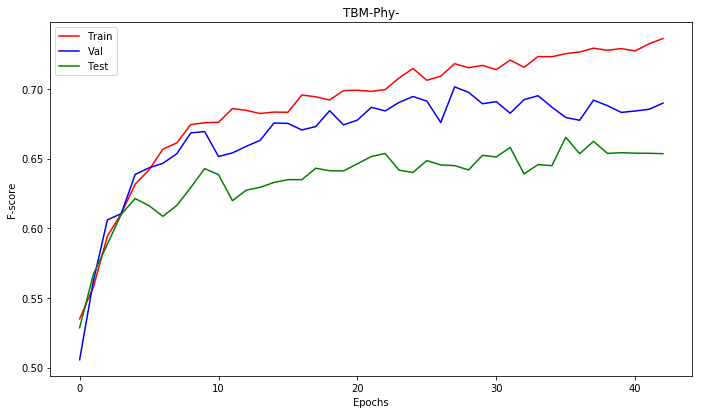

  0%|          | 2/2517 [00:00<02:11, 19.13it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=43=#==#==#==#==#=


100%|██████████| 2517/2517 [01:53<00:00, 22.15it/s]


==========Epoch No:43==========
Training Loss: 1302.1156134
Train: (0.7433516917302474, 0.7473182359952324, 0.7352285211179288, None)
                    0            1
Precision    0.720247     0.756684
Recall       0.505972     0.886591
F-score      0.594388     0.816503
Count      921.000000  1596.000000
--------
Val: (0.6947635460342828, 0.7015873015873015, 0.6931031789424354, None)
                    0           1
Precision    0.643979    0.726651
Recall       0.506173    0.824289
F-score      0.566820    0.772397
Count      243.000000  387.000000
--------
Test: (0.6517248941265698, 0.662007623888183, 0.6531636698659606, None)
                    0           1
Precision    0.564854    0.704380
Recall       0.454545    0.787755
F-score      0.503731    0.743738
Count      297.000000  490.000000




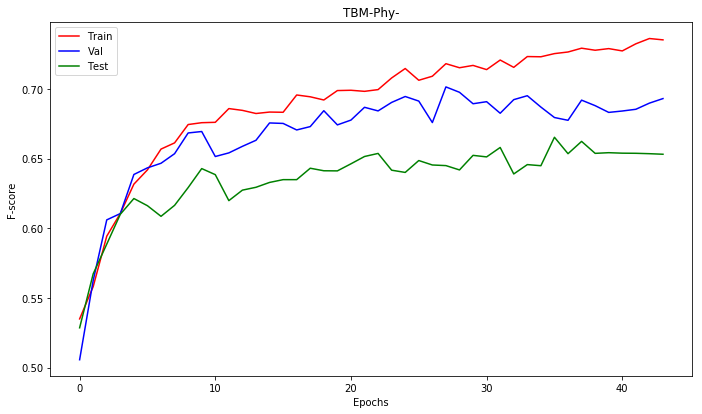

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=44=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.44it/s]


==========Epoch No:44==========
Training Loss: 1304.36132936
Train: (0.7446629210688618, 0.7489074294795391, 0.7377300098606656, None)
                    0            1
Precision    0.718608     0.759698
Recall       0.515744     0.883459
F-score      0.600506     0.816918
Count      921.000000  1596.000000
--------
Val: (0.6813439434129089, 0.6888888888888889, 0.6809252408092523, None)
                    0           1
Precision    0.620513    0.719540
Recall       0.497942    0.808786
F-score      0.552511    0.761557
Count      243.000000  387.000000
--------
Test: (0.6554968987573492, 0.6632782719186785, 0.6575566391202622, None)
                    0           1
Precision    0.562500    0.711864
Recall       0.484848    0.771429
F-score      0.520796    0.740451
Count      297.000000  490.000000




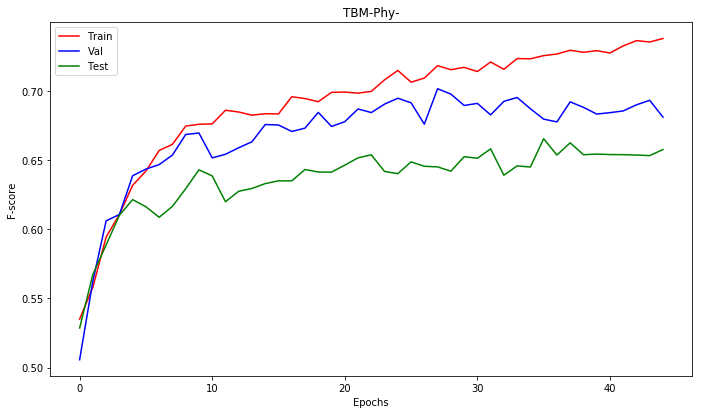

  0%|          | 3/2517 [00:00<01:59, 21.10it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=45=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.54it/s]


==========Epoch No:45==========
Training Loss: 1294.37915172
Train: (0.7473485673288922, 0.7512912197059992, 0.7402199148303428, None)
                    0            1
Precision    0.723147     0.761315
Recall       0.519001     0.885338
F-score      0.604298     0.818656
Count      921.000000  1596.000000
--------
Val: (0.6877957257189763, 0.6952380952380952, 0.6856742584957772, None)
                    0           1
Precision    0.636364    0.720090
Recall       0.489712    0.824289
F-score      0.553488    0.768675
Count      243.000000  387.000000
--------
Test: (0.6552232686188595, 0.6645489199491741, 0.656908457622149, None)
                    0           1
Precision    0.567347    0.708487
Recall       0.468013    0.783673
F-score      0.512915    0.744186
Count      297.000000  490.000000




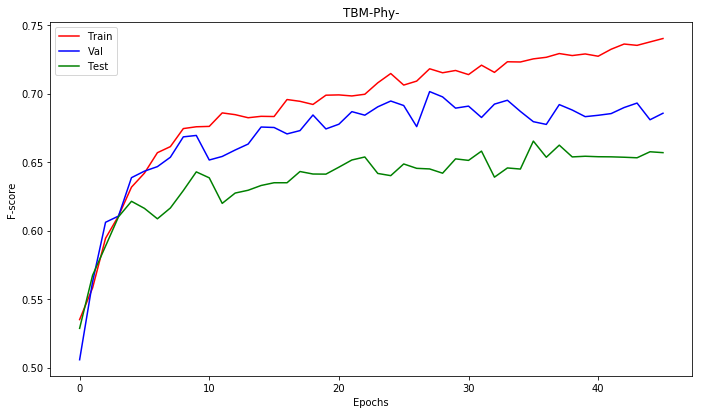

  0%|          | 3/2517 [00:00<01:57, 21.39it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=46=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.27it/s]


==========Epoch No:46==========
Training Loss: 1289.92359707
Train: (0.7498931738431254, 0.7536750099324593, 0.7429393763519534, None)
                    0            1
Precision    0.726316     0.763499
Recall       0.524430     0.885965
F-score      0.609079     0.820186
Count      921.000000  1596.000000
--------
Val: (0.6813439434129089, 0.6888888888888889, 0.6809252408092523, None)
                    0           1
Precision    0.620513    0.719540
Recall       0.497942    0.808786
F-score      0.552511    0.761557
Count      243.000000  387.000000
--------
Test: (0.6544400636414484, 0.6645489199491741, 0.6557714618218555, None)
                    0           1
Precision    0.569038    0.706204
Recall       0.457912    0.789796
F-score      0.507463    0.745665
Count      297.000000  490.000000




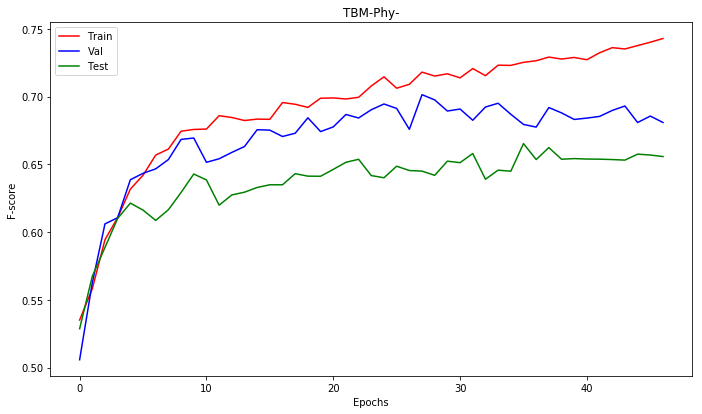

  0%|          | 2/2517 [00:00<02:22, 17.67it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=47=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.31it/s]


==========Epoch No:47==========
Training Loss: 1289.31675006
Train: (0.7548913842620093, 0.7584425903853794, 0.7484684301325903, None)
                    0            1
Precision    0.731852     0.768187
Recall       0.536374     0.886591
F-score      0.619048     0.823153
Count      921.000000  1596.000000
--------
Val: (0.6749341670233834, 0.6825396825396826, 0.6752765428157346, None)
                    0           1
Precision    0.608040    0.716937
Recall       0.497942    0.798450
F-score      0.547511    0.755501
Count      243.000000  387.000000
--------
Test: (0.6616794610846712, 0.6696315120711563, 0.6635145330368488, None)
                    0           1
Precision    0.573123    0.715356
Recall       0.488215    0.779592
F-score      0.527273    0.746094
Count      297.000000  490.000000




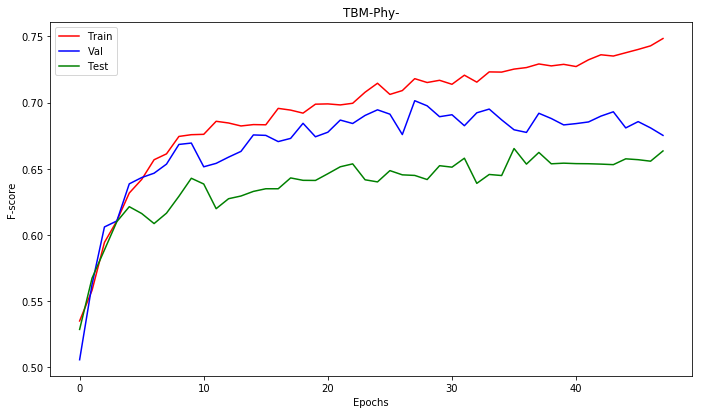

  0%|          | 3/2517 [00:00<01:53, 22.07it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=48=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.63it/s]


==========Epoch No:48==========
Training Loss: 1278.32448164
Train: (0.7562201420796781, 0.7592371871275327, 0.7486320451758084, None)
                    0            1
Precision    0.737557     0.766990
Recall       0.530945     0.890977
F-score      0.617424     0.824348
Count      921.000000  1596.000000
--------
Val: (0.6843464330119489, 0.692063492063492, 0.6824000320217748, None)
                    0           1
Precision    0.631016    0.717833
Recall       0.485597    0.821705
F-score      0.548837    0.766265
Count      243.000000  387.000000
--------
Test: (0.6615784225100756, 0.6709021601016518, 0.6628555994889347, None)
                    0           1
Precision    0.578512    0.711927
Recall       0.471380    0.791837
F-score      0.519481    0.749758
Count      297.000000  490.000000




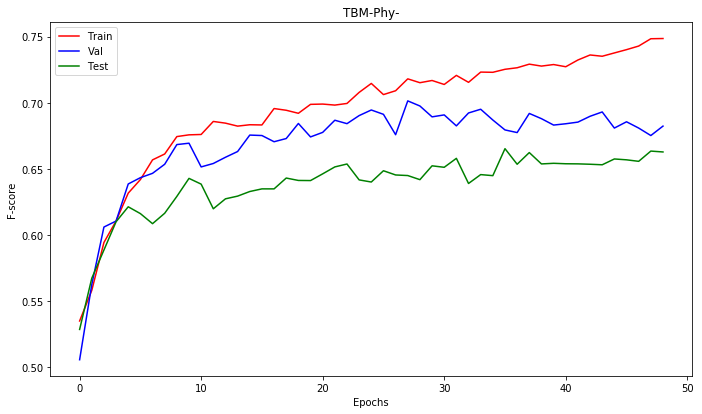

  0%|          | 3/2517 [00:00<01:43, 24.18it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=49=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.34it/s]


==========Epoch No:49==========
Training Loss: 1271.45917986
Train: (0.7585839044456122, 0.7616209773539928, 0.7515610267827737, None)
                    0            1
Precision    0.739195     0.769772
Recall       0.538545     0.890351
F-score      0.623116     0.825683
Count      921.000000  1596.000000
--------
Val: (0.6779537703675635, 0.6857142857142857, 0.6776693759195508, None)
                    0           1
Precision    0.615385    0.717241
Recall       0.493827    0.806202
F-score      0.547945    0.759124
Count      243.000000  387.000000
--------
Test: (0.6531730813435387, 0.6607369758576874, 0.6553091993899621, None)
                    0           1
Precision    0.558140    0.710775
Recall       0.484848    0.767347
F-score      0.518919    0.737978
Count      297.000000  490.000000




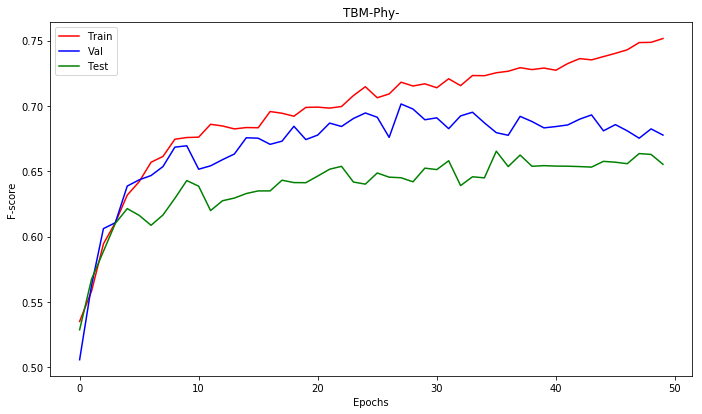

  0%|          | 3/2517 [00:00<01:31, 27.57it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=50=#==#==#==#==#=


100%|██████████| 2517/2517 [01:54<00:00, 22.06it/s]


==========Epoch No:50==========
Training Loss: 1265.26974027
Train: (0.7585839044456122, 0.7616209773539928, 0.7515610267827737, None)
                    0            1
Precision    0.739195     0.769772
Recall       0.538545     0.890351
F-score      0.623116     0.825683
Count      921.000000  1596.000000
--------
Val: (0.6789227300676368, 0.6857142857142857, 0.6797391801548206, None)
                    0           1
Precision    0.609756    0.722353
Recall       0.514403    0.793282
F-score      0.558036    0.756158
Count      243.000000  387.000000
--------
Test: (0.6525337490600507, 0.6607369758576874, 0.6546291062790556, None)
                    0           1
Precision    0.559055    0.709193
Recall       0.478114    0.771429
F-score      0.515426    0.739003
Count      297.000000  490.000000




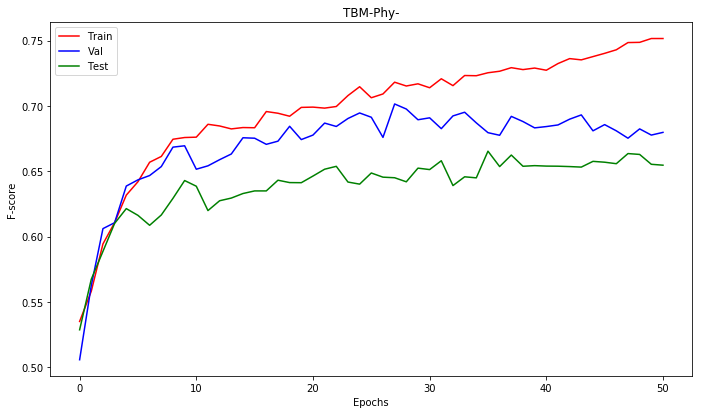

  0%|          | 3/2517 [00:00<01:27, 28.70it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=51=#==#==#==#==#=


100%|██████████| 2517/2517 [01:46<00:00, 23.71it/s]


==========Epoch No:51==========
Training Loss: 1266.11521281
Train: (0.7638639727196453, 0.7659912594358363, 0.7556290385565184, None)
                    0            1
Precision    0.750755     0.771429
Recall       0.539631     0.896617
F-score      0.627922     0.829325
Count      921.000000  1596.000000
--------
Val: (0.6753613825405799, 0.6825396825396826, 0.6761038016643397, None)
                    0           1
Precision    0.605911    0.718970
Recall       0.506173    0.793282
F-score      0.551570    0.754300
Count      243.000000  387.000000
--------
Test: (0.6528502107726305, 0.6607369758576874, 0.6549721609249436, None)
                    0           1
Precision    0.558594    0.709981
Recall       0.481481    0.769388
F-score      0.517179    0.738492
Count      297.000000  490.000000




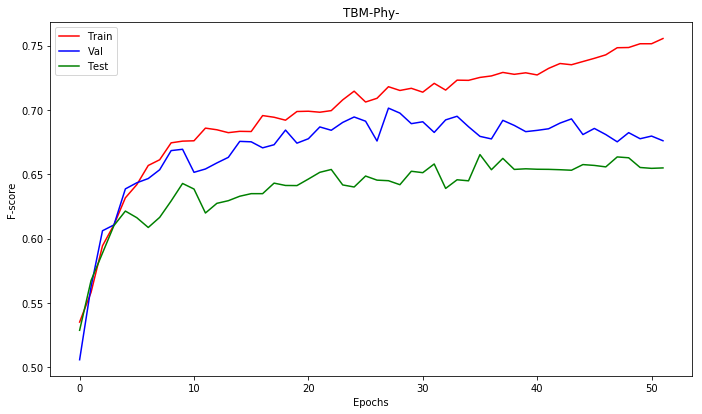

  0%|          | 3/2517 [00:00<01:28, 28.55it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=52=#==#==#==#==#=


100%|██████████| 2517/2517 [01:55<00:00, 21.85it/s]


==========Epoch No:52==========
Training Loss: 1265.11406393
Train: (0.754581125780703, 0.7584425903853794, 0.7490092742405722, None)
                    0            1
Precision    0.728467     0.769651
Recall       0.541802     0.883459
F-score      0.621420     0.822637
Count      921.000000  1596.000000
--------
Val: (0.691263239245302, 0.6952380952380952, 0.6925364513433832, None)
                    0           1
Precision    0.614350    0.739558
Recall       0.563786    0.777778
F-score      0.587983    0.758186
Count      243.000000  387.000000
--------
Test: (0.6526419402328457, 0.6581956797966964, 0.654639764042938, None)
                    0           1
Precision    0.551852    0.713733
Recall       0.501684    0.753061
F-score      0.525573    0.732870
Count      297.000000  490.000000




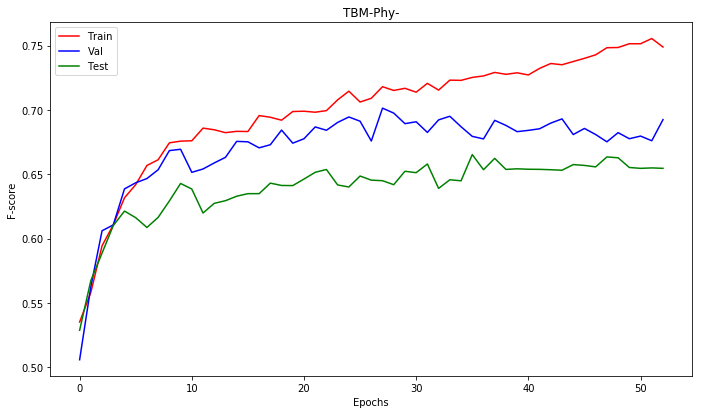

  0%|          | 3/2517 [00:00<01:38, 25.47it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=53=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.43it/s]


==========Epoch No:53==========
Training Loss: 1261.84304006
Train: (0.7549924966079319, 0.7588398887564561, 0.7494753854155627, None)
                    0            1
Precision    0.728863     0.770071
Recall       0.542888     0.883459
F-score      0.622278     0.822877
Count      921.000000  1596.000000
--------
Val: (0.6844897959183673, 0.6904761904761905, 0.6855306981602558, None)
                    0           1
Precision    0.614286    0.728571
Recall       0.530864    0.790698
F-score      0.569536    0.758364
Count      243.000000  387.000000
--------
Test: (0.6554968987573492, 0.6632782719186785, 0.6575566391202622, None)
                    0           1
Precision    0.562500    0.711864
Recall       0.484848    0.771429
F-score      0.520796    0.740451
Count      297.000000  490.000000




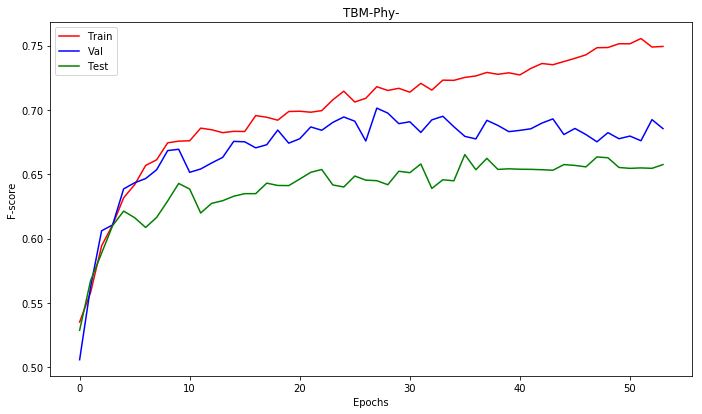

  0%|          | 3/2517 [00:00<01:51, 22.57it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=54=#==#==#==#==#=


100%|██████████| 2517/2517 [02:03<00:00, 20.46it/s]


==========Epoch No:54==========
Training Loss: 1255.71259232
Train: (0.7587736312562369, 0.7620182757250695, 0.752352930815923, None)
                    0            1
Precision    0.737463     0.771071
Recall       0.542888     0.888471
F-score      0.625391     0.825619
Count      921.000000  1596.000000
--------
Val: (0.6851934135516226, 0.692063492063492, 0.6854237641002346, None)
                    0           1
Precision    0.621891    0.724942
Recall       0.514403    0.803618
F-score      0.563063    0.762255
Count      243.000000  387.000000
--------
Test: (0.661967104771421, 0.6696315120711563, 0.663851539270138, None)
                    0           1
Precision    0.572549    0.716165
Recall       0.491582    0.777551
F-score      0.528986    0.745597
Count      297.000000  490.000000




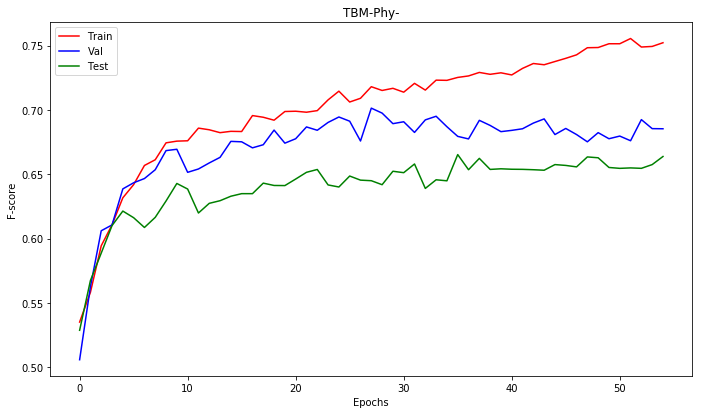

  0%|          | 3/2517 [00:00<01:41, 24.80it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=55=#==#==#==#==#=


100%|██████████| 2517/2517 [02:00<00:00, 20.86it/s]


==========Epoch No:55==========
Training Loss: 1251.58366729
Train: (0.757571918080023, 0.7612236789829162, 0.7520569074778042, None)
                    0            1
Precision    0.732558     0.772007
Recall       0.547231     0.884712
F-score      0.626476     0.824526
Count      921.000000  1596.000000
--------
Val: (0.676521164021164, 0.6841269841269841, 0.6766888440357829, None)
                    0           1
Precision    0.611111    0.717593
Recall       0.497942    0.801034
F-score      0.548753    0.757021
Count      243.000000  387.000000
--------
Test: (0.658143586742068, 0.6658195679796697, 0.6601411173155811, None)
                    0           1
Precision    0.566406    0.713748
Recall       0.488215    0.773469
F-score      0.524412    0.742409
Count      297.000000  490.000000




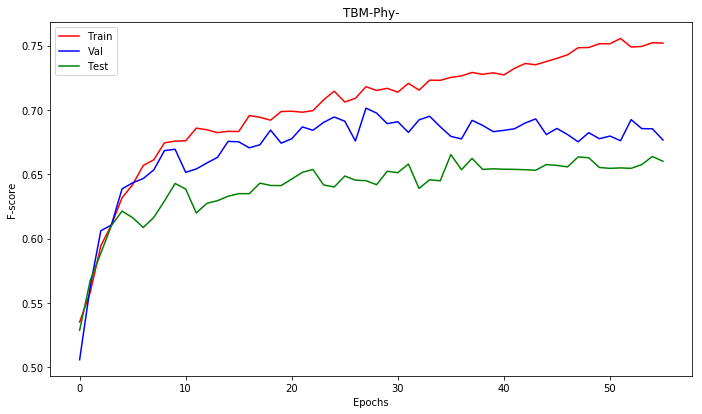

  0%|          | 3/2517 [00:00<02:23, 17.52it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=56=#==#==#==#==#=


100%|██████████| 2517/2517 [01:44<00:00, 24.18it/s]


==========Epoch No:56==========
Training Loss: 1252.48366144
Train: (0.7646906009461024, 0.7679777512912197, 0.7596237119191399, None)
                    0            1
Precision    0.741059     0.778328
Recall       0.562432     0.886591
F-score      0.639506     0.828940
Count      921.000000  1596.000000
--------
Val: (0.675595818815331, 0.6825396825396826, 0.6765042223786065, None)
                    0           1
Precision    0.604878    0.720000
Recall       0.510288    0.790698
F-score      0.553571    0.753695
Count      243.000000  387.000000
--------
Test: (0.661399028287087, 0.6696315120711563, 0.663171602642773, None)
                    0           1
Precision    0.573705    0.714552
Recall       0.484848    0.781633
F-score      0.525547    0.746589
Count      297.000000  490.000000




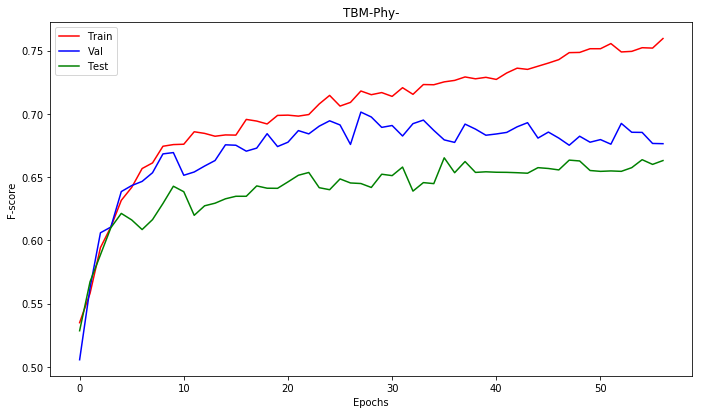

  0%|          | 3/2517 [00:00<01:27, 28.78it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=57=#==#==#==#==#=


100%|██████████| 2517/2517 [01:46<00:00, 23.58it/s]


==========Epoch No:57==========
Training Loss: 1248.91775255
Train: (0.7640618002310049, 0.7671831545490664, 0.7583980734904708, None)
                    0            1
Precision    0.742402     0.776561
Recall       0.557003     0.888471
F-score      0.636476     0.828755
Count      921.000000  1596.000000
--------
Val: (0.6773787716222228, 0.6841269841269841, 0.6783176597005932, None)
                    0           1
Precision    0.606796    0.721698
Recall       0.514403    0.790698
F-score      0.556793    0.754624
Count      243.000000  387.000000
--------
Test: (0.6567999105930257, 0.6632782719186785, 0.6588593002825146, None)
                    0           1
Precision    0.560606    0.715105
Recall       0.498316    0.763265
F-score      0.527629    0.738401
Count      297.000000  490.000000




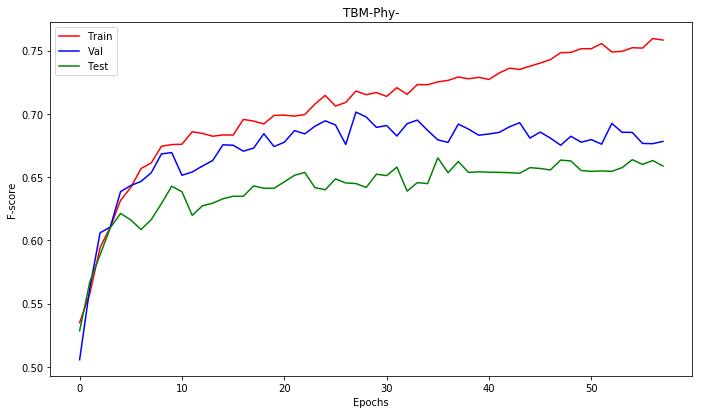

  0%|          | 3/2517 [00:00<01:37, 25.66it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=58=#==#==#==#==#=


100%|██████████| 2517/2517 [01:45<00:00, 23.88it/s]


==========Epoch No:58==========
Training Loss: 1242.63303386
Train: (0.7633840840117184, 0.766388557806913, 0.7572655481142375, None)
                    0            1
Precision    0.743066     0.775109
Recall       0.552660     0.889724
F-score      0.633873     0.828471
Count      921.000000  1596.000000
--------
Val: (0.676521164021164, 0.6841269841269841, 0.6766888440357829, None)
                    0           1
Precision    0.611111    0.717593
Recall       0.497942    0.801034
F-score      0.548753    0.757021
Count      243.000000  387.000000
--------
Test: (0.6684428748204068, 0.6772554002541296, 0.669545737184765, None)
                    0           1
Precision    0.588477    0.716912
Recall       0.481481    0.795918
F-score      0.529630    0.754352
Count      297.000000  490.000000




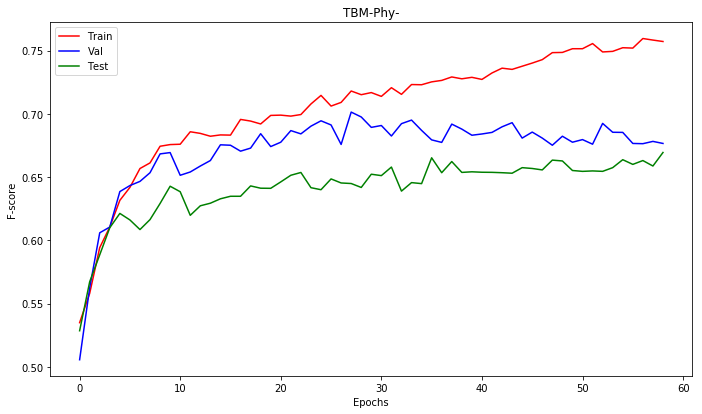

  0%|          | 3/2517 [00:00<01:59, 20.99it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=59=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.64it/s]


==========Epoch No:59==========
Training Loss: 1237.88737084
Train: (0.7685230690540041, 0.7715534366309098, 0.763474280080967, None)
                    0            1
Precision    0.746439     0.781267
Recall       0.568947     0.888471
F-score      0.645718     0.831428
Count      921.000000  1596.000000
--------
Val: (0.6867857142857143, 0.6936507936507936, 0.686844651131214, None)
                    0           1
Precision    0.625000    0.725581
Recall       0.514403    0.806202
F-score      0.564334    0.763770
Count      243.000000  387.000000
--------
Test: (0.661967104771421, 0.6696315120711563, 0.663851539270138, None)
                    0           1
Precision    0.572549    0.716165
Recall       0.491582    0.777551
F-score      0.528986    0.745597
Count      297.000000  490.000000




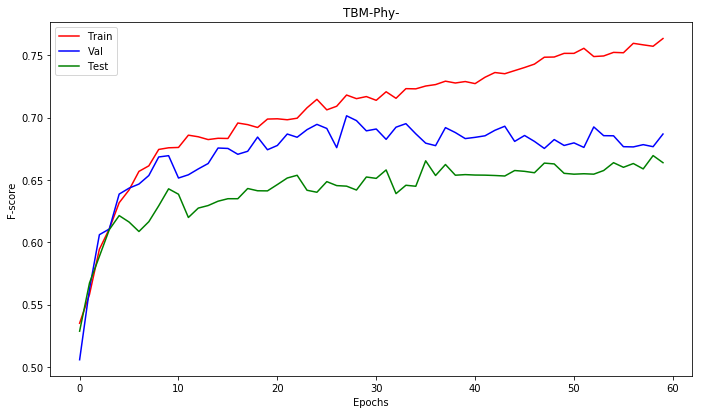

  0%|          | 3/2517 [00:00<01:29, 28.23it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=60=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.53it/s]


==========Epoch No:60==========
Training Loss: 1235.61721595
Train: (0.7633509918354692, 0.7659912594358363, 0.7562757161655959, None)
                    0            1
Precision    0.746291     0.773196
Recall       0.546145     0.892857
F-score      0.630721     0.828729
Count      921.000000  1596.000000
--------
Val: (0.6842482162387375, 0.6904761904761905, 0.6851613519586627, None)
                    0           1
Precision    0.615385    0.727488
Recall       0.526749    0.793282
F-score      0.567627    0.758962
Count      243.000000  387.000000
--------
Test: (0.65749074474708, 0.6632782719186785, 0.6594756556677904, None)
                    0           1
Precision    0.559701    0.716763
Recall       0.505051    0.759184
F-score      0.530973    0.737364
Count      297.000000  490.000000




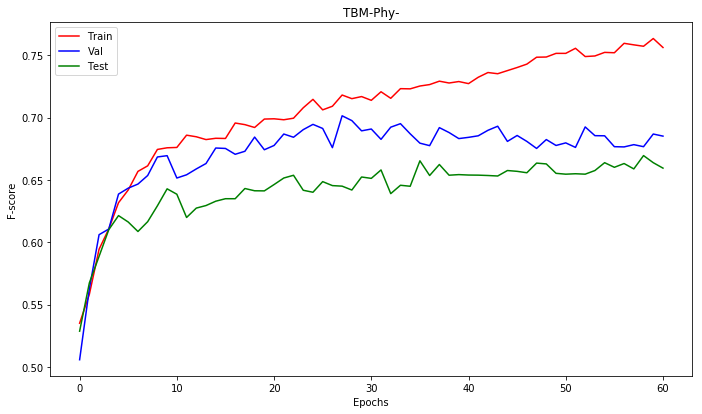

  0%|          | 3/2517 [00:00<01:32, 27.07it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=61=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.78it/s]


==========Epoch No:61==========
Training Loss: 1235.86204033
Train: (0.7671880358742408, 0.7703615415176798, 0.7622889649776231, None)
                    0            1
Precision    0.743954     0.780595
Recall       0.567861     0.887218
F-score      0.644089     0.830499
Count      921.000000  1596.000000
--------
Val: (0.699052905158363, 0.7047619047619048, 0.6995132275132275, None)
                    0           1
Precision    0.637681    0.737589
Recall       0.543210    0.806202
F-score      0.586667    0.770370
Count      243.000000  387.000000
--------
Test: (0.6572580787896427, 0.6658195679796697, 0.6591094161678229, None)
                    0           1
Precision    0.568000    0.711359
Recall       0.478114    0.779592
F-score      0.519196    0.743914
Count      297.000000  490.000000




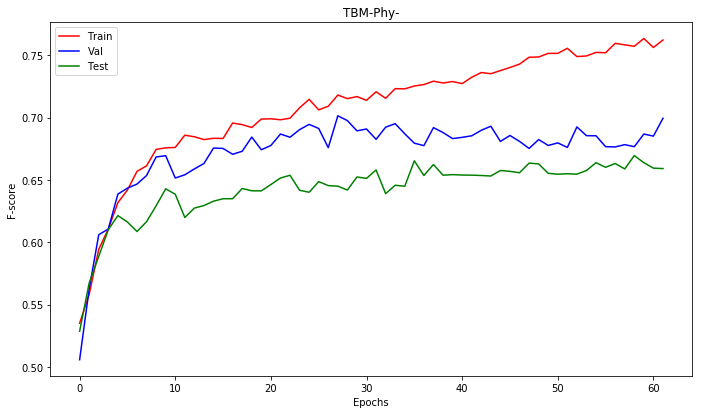

  0%|          | 3/2517 [00:00<01:29, 28.13it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=62=#==#==#==#==#=


100%|██████████| 2517/2517 [02:03<00:00, 20.32it/s]


==========Epoch No:62==========
Training Loss: 1230.14707929
Train: (0.7710761587902271, 0.7735399284862932, 0.7649947131221304, None)
                    0            1
Precision    0.753980     0.780942
Recall       0.565689     0.893484
F-score      0.646402     0.833431
Count      921.000000  1596.000000
--------
Val: (0.6718997124370956, 0.6777777777777778, 0.6733725553245352, None)
                    0           1
Precision    0.593458    0.721154
Recall       0.522634    0.775194
F-score      0.555799    0.747198
Count      243.000000  387.000000
--------
Test: (0.6552439423022568, 0.6607369758576874, 0.657207498139273, None)
                    0           1
Precision    0.555556    0.715667
Recall       0.505051    0.755102
F-score      0.529101    0.734856
Count      297.000000  490.000000




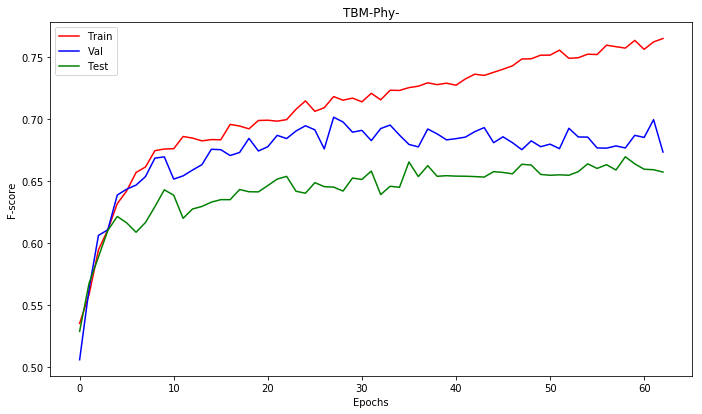

  0%|          | 3/2517 [00:00<02:00, 20.78it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=63=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.71it/s]


==========Epoch No:63==========
Training Loss: 1230.22300532
Train: (0.7702793223652386, 0.7735399284862932, 0.7662398235392335, None)
                    0            1
Precision    0.744770     0.785000
Recall       0.579805     0.885338
F-score      0.652015     0.832155
Count      921.000000  1596.000000
--------
Val: (0.6863699314966695, 0.6936507936507936, 0.6855953608994751, None)
                    0           1
Precision    0.628866    0.722477
Recall       0.502058    0.813953
F-score      0.558352    0.765492
Count      243.000000  387.000000
--------
Test: (0.6554982439754726, 0.6645489199491741, 0.6572749860852793, None)
                    0           1
Precision    0.566802    0.709259
Recall       0.471380    0.781633
F-score      0.514706    0.743689
Count      297.000000  490.000000




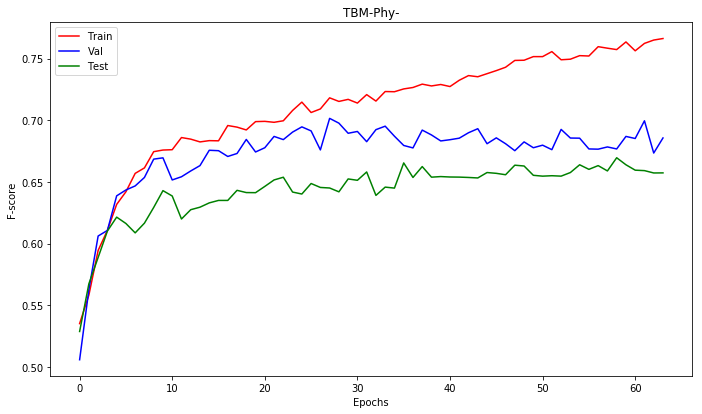

  0%|          | 3/2517 [00:00<01:26, 29.17it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=64=#==#==#==#==#=


100%|██████████| 2517/2517 [02:02<00:00, 20.63it/s]


==========Epoch No:64==========
Training Loss: 1235.90193923
Train: (0.7678388559793066, 0.7707588398887565, 0.7623572277880091, None)
                    0            1
Precision    0.747126     0.779791
Recall       0.564604     0.889724
F-score      0.643166     0.831138
Count      921.000000  1596.000000
--------
Val: (0.6848715556843246, 0.692063492063492, 0.6846040544821033, None)
                    0           1
Precision    0.624365    0.722864
Recall       0.506173    0.808786
F-score      0.559091    0.763415
Count      243.000000  387.000000
--------
Test: (0.6672676346670549, 0.6747141041931385, 0.6690230540505975, None)
                    0           1
Precision    0.580392    0.719925
Recall       0.498316    0.781633
F-score      0.536232    0.749511
Count      297.000000  490.000000




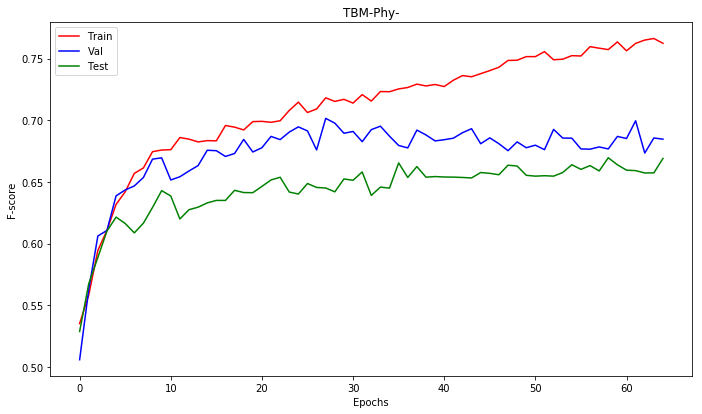

  0%|          | 3/2517 [00:00<01:28, 28.48it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=65=#==#==#==#==#=


100%|██████████| 2517/2517 [01:59<00:00, 21.15it/s]


==========Epoch No:65==========
Training Loss: 1222.18025905
Train: (0.7695867442413008, 0.7723480333730631, 0.7640046646837594, None)
                    0            1
Precision    0.750000     0.780890
Recall       0.566775     0.890977
F-score      0.645640     0.832309
Count      921.000000  1596.000000
--------
Val: (0.6782976866433593, 0.6857142857142857, 0.6785237773875773, None)
                    0           1
Precision    0.613065    0.719258
Recall       0.502058    0.801034
F-score      0.552036    0.757946
Count      243.000000  387.000000
--------
Test: (0.6545891121790549, 0.6632782719186785, 0.6565170923363995, None)
                    0           1
Precision    0.564000    0.709497
Recall       0.474747    0.777551
F-score      0.515539    0.741967
Count      297.000000  490.000000




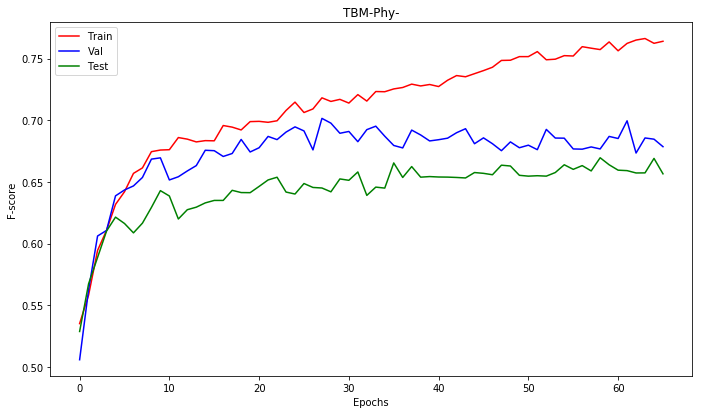

  0%|          | 3/2517 [00:00<01:51, 22.62it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=66=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.51it/s]


==========Epoch No:66==========
Training Loss: 1224.55692133
Train: (0.7691833579029318, 0.7719507350019865, 0.7635435908868032, None)
                    0            1
Precision    0.749640     0.780461
Recall       0.565689     0.890977
F-score      0.644802     0.832066
Count      921.000000  1596.000000
--------
Val: (0.6782976866433593, 0.6857142857142857, 0.6785237773875773, None)
                    0           1
Precision    0.613065    0.719258
Recall       0.502058    0.801034
F-score      0.552036    0.757946
Count      243.000000  387.000000
--------
Test: (0.6533994502278271, 0.6594663278271918, 0.655467012001695, None)
                    0           1
Precision    0.554307    0.713462
Recall       0.498316    0.757143
F-score      0.524823    0.734653
Count      297.000000  490.000000




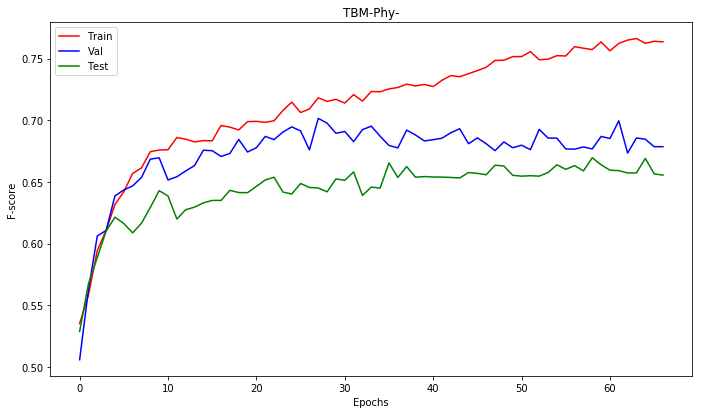

  0%|          | 3/2517 [00:00<01:41, 24.78it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=67=#==#==#==#==#=


100%|██████████| 2517/2517 [01:54<00:00, 21.94it/s]


==========Epoch No:67==========
Training Loss: 1223.70124196
Train: (0.7734359460341469, 0.77632101708383, 0.7688800237792672, None)
                    0            1
Precision    0.751404     0.786150
Recall       0.580890     0.889098
F-score      0.655236     0.834460
Count      921.000000  1596.000000
--------
Val: (0.6848715556843246, 0.692063492063492, 0.6846040544821033, None)
                    0           1
Precision    0.624365    0.722864
Recall       0.506173    0.808786
F-score      0.559091    0.763415
Count      243.000000  387.000000
--------
Test: (0.6593168398236041, 0.6670902160101652, 0.6612657818799084, None)
                    0           1
Precision    0.568627    0.714286
Recall       0.488215    0.775510
F-score      0.525362    0.743640
Count      297.000000  490.000000




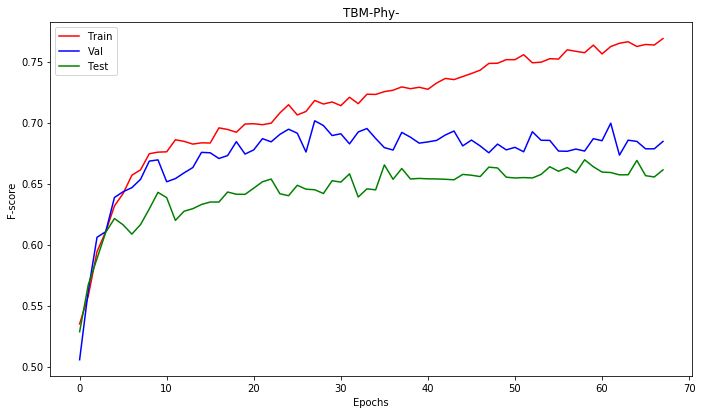

  0%|          | 2/2517 [00:00<02:08, 19.52it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=68=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.66it/s]


==========Epoch No:68==========
Training Loss: 1217.91834657
Train: (0.769608646413145, 0.7731426301152166, 0.7663341433401729, None)
                    0            1
Precision    0.740385     0.786473
Recall       0.585233     0.881579
F-score      0.653730     0.831315
Count      921.000000  1596.000000
--------
Val: (0.6898758581773723, 0.6968253968253968, 0.6892741900002894, None)
                    0           1
Precision    0.632653    0.725806
Recall       0.510288    0.813953
F-score      0.564920    0.767357
Count      243.000000  387.000000
--------
Test: (0.6704727012859161, 0.6772554002541296, 0.6722500786039599, None)
                    0           1
Precision    0.583012    0.723485
Recall       0.508418    0.779592
F-score      0.543165    0.750491
Count      297.000000  490.000000




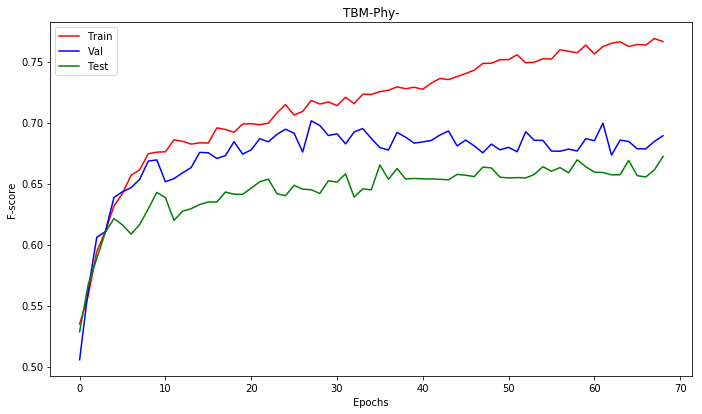

  0%|          | 4/2517 [00:00<01:24, 29.63it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=69=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.60it/s]


==========Epoch No:69==========
Training Loss: 1205.76730011
Train: (0.7802300151376473, 0.7826777910210568, 0.7756276725058695, None)
                    0            1
Precision    0.761173     0.791227
Recall       0.591748     0.892857
F-score      0.665852     0.838976
Count      921.000000  1596.000000
--------
Val: (0.6798911736411736, 0.6873015873015873, 0.6799382023871821, None)
                    0           1
Precision    0.616162    0.719907
Recall       0.502058    0.803618
F-score      0.553288    0.759463
Count      243.000000  387.000000
--------
Test: (0.664064143962752, 0.6721728081321474, 0.6657625903147515, None)
                    0           1
Precision    0.577689    0.716418
Recall       0.488215    0.783673
F-score      0.529197    0.748538
Count      297.000000  490.000000




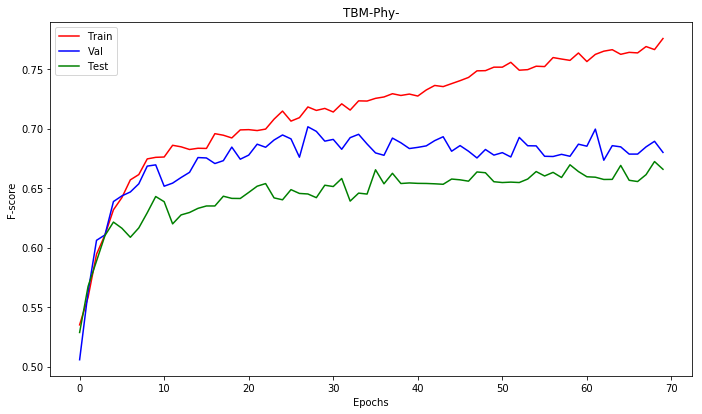

  0%|          | 3/2517 [00:00<01:56, 21.58it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=70=#==#==#==#==#=


100%|██████████| 2517/2517 [01:53<00:00, 22.27it/s]


==========Epoch No:70==========
Training Loss: 1204.68751654
Train: (0.7797680154309136, 0.7822804926499801, 0.7752621461394736, None)
                    0            1
Precision    0.760112     0.791111
Recall       0.591748     0.892231
F-score      0.665446     0.838634
Count      921.000000  1596.000000
--------
Val: (0.6806999581294324, 0.6873015873015873, 0.681550648045311, None)
                    0           1
Precision    0.611650    0.724057
Recall       0.518519    0.793282
F-score      0.561247    0.757090
Count      243.000000  387.000000
--------
Test: (0.6655303216656516, 0.6734434561626429, 0.6672283056281935, None)
                    0           1
Precision    0.579365    0.717757
Recall       0.491582    0.783673
F-score      0.531876    0.749268
Count      297.000000  490.000000




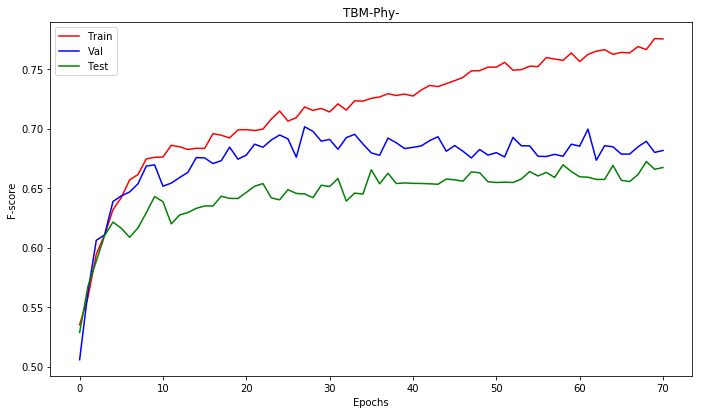

  0%|          | 3/2517 [00:00<01:28, 28.25it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=71=#==#==#==#==#=


100%|██████████| 2517/2517 [01:46<00:00, 23.62it/s]


==========Epoch No:71==========
Training Loss: 1205.91486035
Train: (0.7803576777851473, 0.7826777910210568, 0.7754482646665349, None)
                    0            1
Precision    0.762640     0.790582
Recall       0.589577     0.894110
F-score      0.665034     0.839165
Count      921.000000  1596.000000
--------
Val: (0.6751407796183916, 0.6825396825396826, 0.6756946021651905, None)
                    0           1
Precision    0.606965    0.717949
Recall       0.502058    0.795866
F-score      0.549550    0.754902
Count      243.000000  387.000000
--------
Test: (0.6706029118425816, 0.6785260482846251, 0.67207103532494, None)
                    0           1
Precision    0.588000    0.720670
Recall       0.494949    0.789796
F-score      0.537477    0.753651
Count      297.000000  490.000000




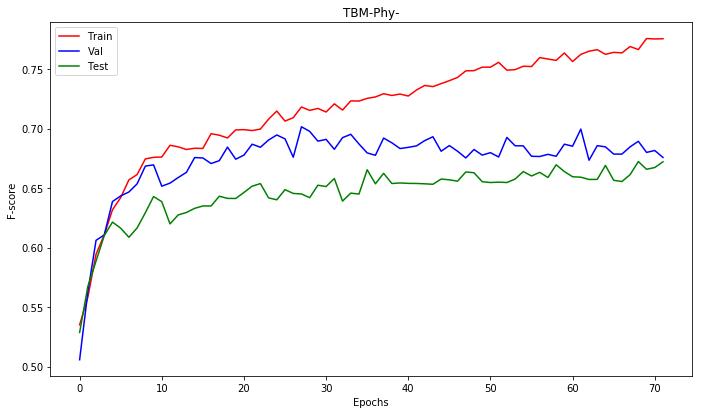

  0%|          | 3/2517 [00:00<01:30, 27.71it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=72=#==#==#==#==#=


100%|██████████| 2517/2517 [01:50<00:00, 22.80it/s]


==========Epoch No:72==========
Training Loss: 1195.16190481
Train: (0.7838932729510822, 0.7862534763607469, 0.7796240342494242, None)
                    0            1
Precision    0.764869     0.794872
Recall       0.600434     0.893484
F-score      0.672749     0.841298
Count      921.000000  1596.000000
--------
Val: (0.6791595083917008, 0.6857142857142857, 0.680126984126984, None)
                    0           1
Precision    0.608696    0.723404
Recall       0.518519    0.790698
F-score      0.560000    0.755556
Count      243.000000  387.000000
--------
Test: (0.6699178996148717, 0.6772554002541296, 0.6716088114408271, None)
                    0           1
Precision    0.584314    0.721805
Recall       0.501684    0.783673
F-score      0.539855    0.751468
Count      297.000000  490.000000




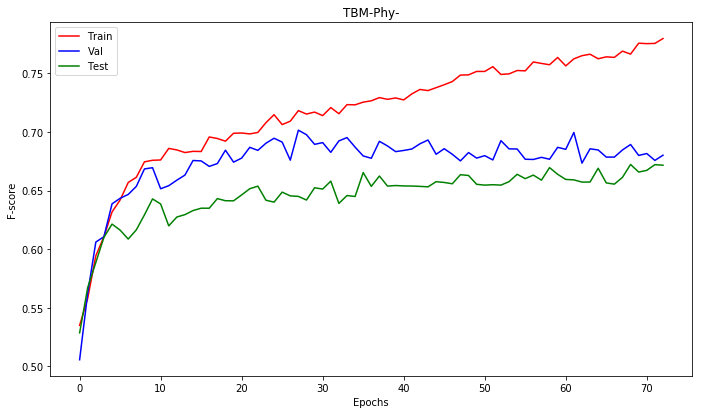

  0%|          | 2/2517 [00:00<02:37, 16.00it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=73=#==#==#==#==#=


100%|██████████| 2517/2517 [01:53<00:00, 22.17it/s]


==========Epoch No:73==========
Training Loss: 1190.221782
Train: (0.7868839063439361, 0.788637266587207, 0.7815621024672027, None)
                    0            1
Precision    0.773558     0.794574
Recall       0.597177     0.899123
F-score      0.674020     0.843621
Count      921.000000  1596.000000
--------
Val: (0.6715706474034074, 0.6793650793650794, 0.6720293082438917, None)
                    0           1
Precision    0.603015    0.714617
Recall       0.493827    0.795866
F-score      0.542986    0.753056
Count      243.000000  387.000000
--------
Test: (0.6689025423058726, 0.6772554002541296, 0.6702569941881097, None)
                    0           1
Precision    0.587045    0.718519
Recall       0.488215    0.791837
F-score      0.533088    0.753398
Count      297.000000  490.000000




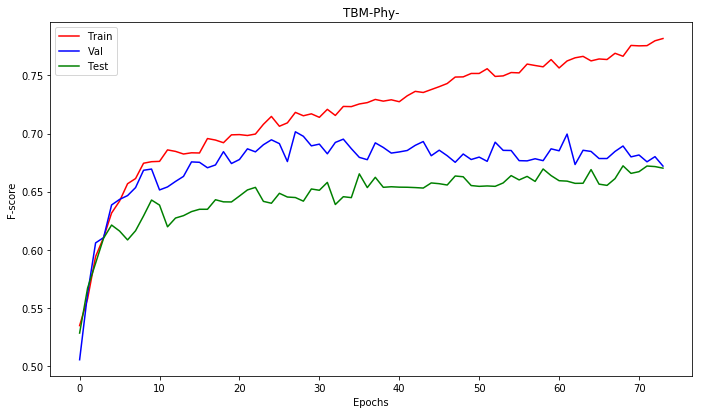

  0%|          | 4/2517 [00:00<01:16, 32.73it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=74=#==#==#==#==#=


100%|██████████| 2517/2517 [02:04<00:00, 20.19it/s]


==========Epoch No:74==========
Training Loss: 1191.85933179
Train: (0.7864141930672727, 0.7882399682161303, 0.7811954754428942, None)
                    0            1
Precision    0.772472     0.794460
Recall       0.597177     0.898496
F-score      0.673607     0.843281
Count      921.000000  1596.000000
--------
Val: (0.6717899016406479, 0.6793650793650794, 0.6724515481868423, None)
                    0           1
Precision    0.601990    0.715618
Recall       0.497942    0.793282
F-score      0.545045    0.752451
Count      243.000000  387.000000
--------
Test: (0.6605659604187587, 0.6670902160101652, 0.6625653538785197, None)
                    0           1
Precision    0.566540    0.717557
Recall       0.501684    0.767347
F-score      0.532143    0.741617
Count      297.000000  490.000000




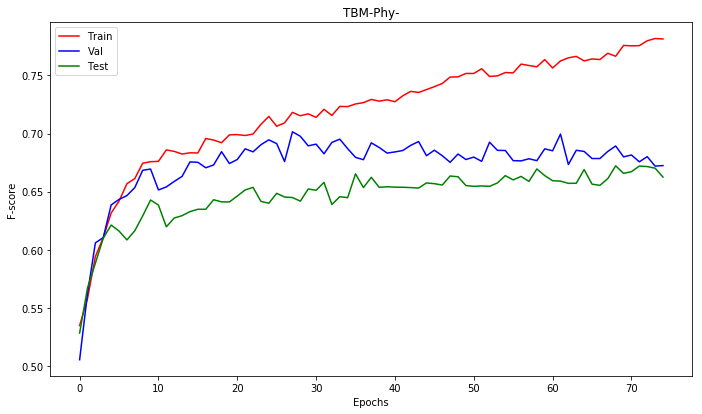

  0%|          | 3/2517 [00:00<01:24, 29.68it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=75=#==#==#==#==#=


100%|██████████| 2517/2517 [01:56<00:00, 21.59it/s]


==========Epoch No:75==========
Training Loss: 1187.11495039
Train: (0.7847528244124193, 0.7870480731029003, 0.7804432757577907, None)
                    0            1
Precision    0.766252     0.795429
Recall       0.601520     0.894110
F-score      0.673966     0.841888
Count      921.000000  1596.000000
--------
Val: (0.6747417129593188, 0.6825396825396826, 0.6748495407031994, None)
                    0           1
Precision    0.609137    0.715935
Recall       0.493827    0.801034
F-score      0.545455    0.756098
Count      243.000000  387.000000
--------
Test: (0.6732718784531694, 0.6810673443456162, 0.6746633591563632, None)
                    0           1
Precision    0.592000    0.722533
Recall       0.498316    0.791837
F-score      0.541133    0.755599
Count      297.000000  490.000000




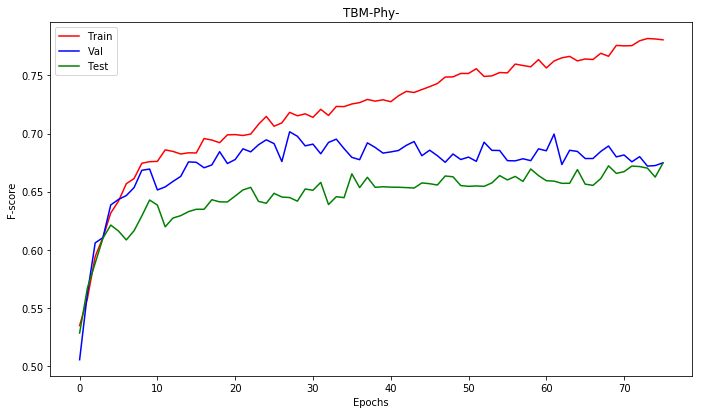

  0%|          | 0/2517 [00:00<?, ?it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=76=#==#==#==#==#=


100%|██████████| 2517/2517 [01:58<00:00, 21.24it/s]


==========Epoch No:76==========
Training Loss: 1180.3913143
Train: (0.7897807383950189, 0.7918156535558204, 0.7855260189399768, None)
                    0            1
Precision    0.773040     0.799441
Recall       0.610206     0.896617
F-score      0.682039     0.845245
Count      921.000000  1596.000000
--------
Val: (0.6784916575961353, 0.6857142857142857, 0.6789376561435385, None)
                    0           1
Precision    0.611940    0.720280
Recall       0.506173    0.798450
F-score      0.554054    0.757353
Count      243.000000  387.000000
--------
Test: (0.6720594909897476, 0.6797966963151207, 0.6735355533306875, None)
                    0           1
Precision    0.589641    0.722015
Recall       0.498316    0.789796
F-score      0.540146    0.754386
Count      297.000000  490.000000




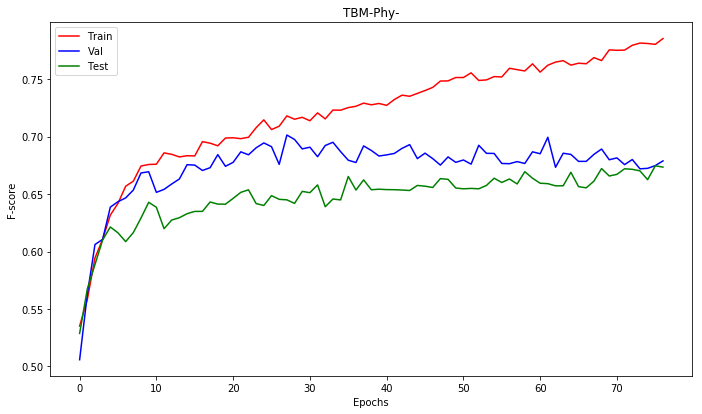

  0%|          | 3/2517 [00:00<01:59, 21.00it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=77=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.43it/s]


==========Epoch No:77==========
Training Loss: 1179.84599394
Train: (0.7906382950817522, 0.7926102502979738, 0.786344621921122, None)
                    0            1
Precision    0.774415     0.800000
Recall       0.611292     0.897243
F-score      0.683252     0.845836
Count      921.000000  1596.000000
--------
Val: (0.6882481699259932, 0.6952380952380952, 0.6878555590750713, None)
                    0           1
Precision    0.629442    0.725173
Recall       0.510288    0.811370
F-score      0.563636    0.765854
Count      243.000000  387.000000
--------
Test: (0.6564350115301248, 0.6658195679796697, 0.6580231627126656, None)
                    0           1
Precision    0.569672    0.709024
Recall       0.468013    0.785714
F-score      0.513863    0.745402
Count      297.000000  490.000000




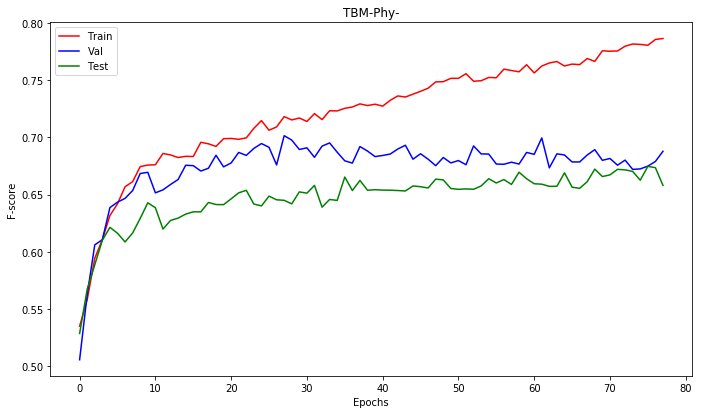

  0%|          | 3/2517 [00:00<01:31, 27.39it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=78=#==#==#==#==#=


100%|██████████| 2517/2517 [01:57<00:00, 21.43it/s]


==========Epoch No:78==========
Training Loss: 1171.29907046
Train: (0.7915270332518665, 0.7930075486690504, 0.786207304342954, None)
                    0            1
Precision    0.780112     0.798114
Recall       0.604777     0.901629
F-score      0.681346     0.846720
Count      921.000000  1596.000000
--------
Val: (0.6850247258833112, 0.692063492063492, 0.6850182465312624, None)
                    0           1
Precision    0.623116    0.723898
Recall       0.510288    0.806202
F-score      0.561086    0.762836
Count      243.000000  387.000000
--------
Test: (0.6667292596384172, 0.6747141041931385, 0.6683535779867302, None)
                    0           1
Precision    0.581673    0.718284
Recall       0.491582    0.785714
F-score      0.532847    0.750487
Count      297.000000  490.000000




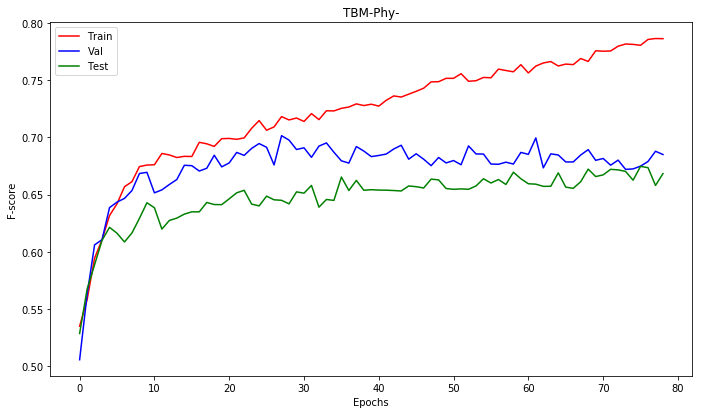

  0%|          | 3/2517 [00:00<01:30, 27.82it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=79=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.78it/s]


==========Epoch No:79==========
Training Loss: 1168.02186929
Train: (0.7890872102362532, 0.7906237584425904, 0.7835715089750052, None)
                    0            1
Precision    0.777465     0.795794
Recall       0.599349     0.901003
F-score      0.676885     0.845137
Count      921.000000  1596.000000
--------
Val: (0.684612635440821, 0.692063492063492, 0.6837493160620444, None)
                    0           1
Precision    0.626943    0.720824
Recall       0.497942    0.813953
F-score      0.555046    0.764563
Count      243.000000  387.000000
--------
Test: (0.6686686557760997, 0.6772554002541296, 0.6699043493788859, None)
                    0           1
Precision    0.587755    0.717712
Recall       0.484848    0.793878
F-score      0.531365    0.753876
Count      297.000000  490.000000




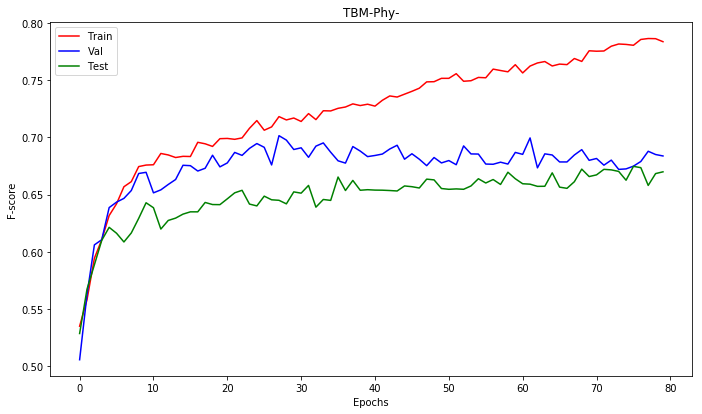

  0%|          | 3/2517 [00:00<01:32, 27.09it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=80=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.65it/s]


==========Epoch No:80==========
Training Loss: 1167.3660585
Train: (0.7945316257439774, 0.7961859356376639, 0.7899875410798318, None)
                    0            1
Precision    0.780992     0.802345
Recall       0.615635     0.900376
F-score      0.688525     0.848539
Count      921.000000  1596.000000
--------
Val: (0.6802449665772726, 0.6857142857142857, 0.6815935831039993, None)
                    0           1
Precision    0.604651    0.727711
Recall       0.534979    0.780362
F-score      0.567686    0.753117
Count      243.000000  387.000000
--------
Test: (0.6617169591097057, 0.6683608640406608, 0.6636965174242441, None)
                    0           1
Precision    0.568702    0.718095
Recall       0.501684    0.769388
F-score      0.533095    0.742857
Count      297.000000  490.000000




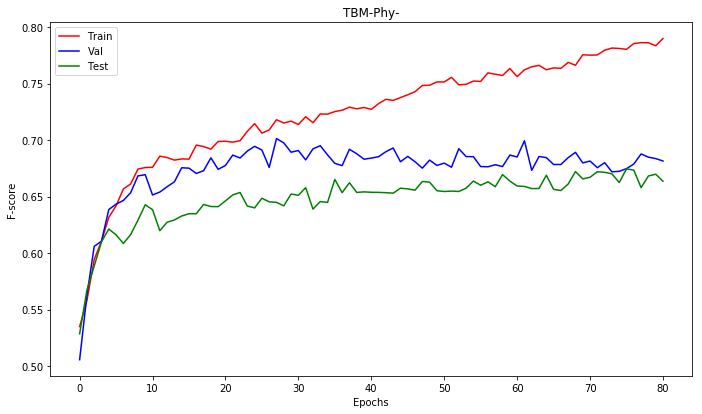

  0%|          | 3/2517 [00:00<01:50, 22.79it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=81=#==#==#==#==#=


100%|██████████| 2517/2517 [01:59<00:00, 21.04it/s]


==========Epoch No:81==========
Training Loss: 1166.97200045
Train: (0.7972287175987727, 0.7989670242352006, 0.7932117844953899, None)
                    0            1
Precision    0.782313     0.805836
Recall       0.624321     0.899749
F-score      0.694444     0.850207
Count      921.000000  1596.000000
--------
Val: (0.6635352789764554, 0.6682539682539682, 0.6651444801901284, None)
                    0           1
Precision    0.576577    0.718137
Recall       0.526749    0.757106
F-score      0.550538    0.737107
Count      243.000000  387.000000
--------
Test: (0.6708559547187247, 0.6759847522236341, 0.6726139027172833, None)
                    0           1
Precision    0.577778    0.727273
Recall       0.525253    0.767347
F-score      0.550265    0.746773
Count      297.000000  490.000000




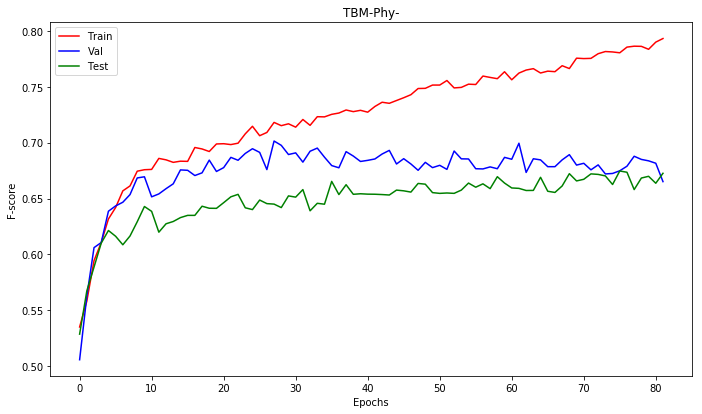

  0%|          | 3/2517 [00:00<01:56, 21.57it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=82=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.79it/s]


==========Epoch No:82==========
Training Loss: 1166.43553311
Train: (0.7922260768694465, 0.7941994437822805, 0.7881455805341805, None)
                    0            1
Precision    0.775650     0.801792
Recall       0.615635     0.897243
F-score      0.686441     0.846836
Count      921.000000  1596.000000
--------
Val: (0.6720227039374257, 0.6793650793650794, 0.6728648396809831, None)
                    0           1
Precision    0.600985    0.716628
Recall       0.502058    0.790698
F-score      0.547085    0.751843
Count      243.000000  387.000000
--------
Test: (0.662330409476575, 0.6709021601016518, 0.6639435163921368, None)
                    0           1
Precision    0.576613    0.714286
Recall       0.481481    0.785714
F-score      0.524771    0.748299
Count      297.000000  490.000000




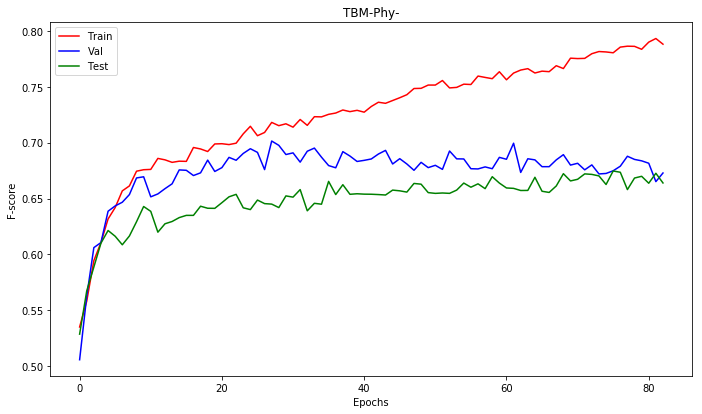

  0%|          | 4/2517 [00:00<01:23, 30.13it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=83=#==#==#==#==#=


100%|██████████| 2517/2517 [02:01<00:00, 20.67it/s]


==========Epoch No:83==========
Training Loss: 1163.64218448
Train: (0.7940685218286853, 0.7957886372665872, 0.7896190338457026, None)
                    0            1
Precision    0.779917     0.802235
Recall       0.615635     0.899749
F-score      0.688107     0.848198
Count      921.000000  1596.000000
--------
Val: (0.6794102509566942, 0.6857142857142857, 0.680506252268716, None)
                    0           1
Precision    0.607656    0.724466
Recall       0.522634    0.788114
F-score      0.561947    0.754950
Count      243.000000  387.000000
--------
Test: (0.661967104771421, 0.6696315120711563, 0.663851539270138, None)
                    0           1
Precision    0.572549    0.716165
Recall       0.491582    0.777551
F-score      0.528986    0.745597
Count      297.000000  490.000000




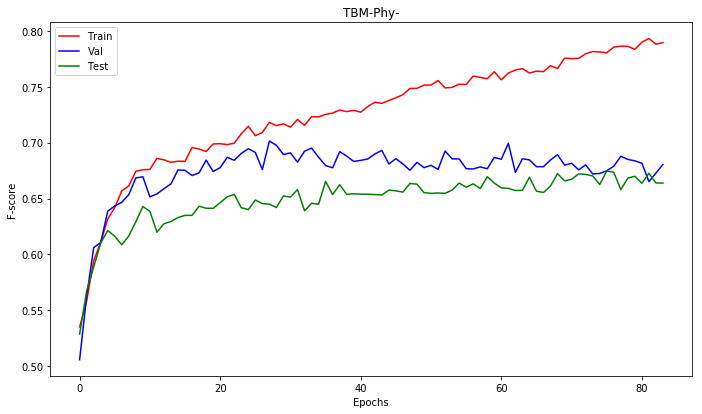

  0%|          | 3/2517 [00:00<01:27, 28.57it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=84=#==#==#==#==#=


100%|██████████| 2517/2517 [01:59<00:00, 20.99it/s]


==========Epoch No:84==========
Training Loss: 1161.67042108
Train: (0.7940426429763956, 0.7961859356376639, 0.7906282490839089, None)
                    0            1
Precision    0.774933     0.805070
Recall       0.624321     0.895363
F-score      0.691521     0.847820
Count      921.000000  1596.000000
--------
Val: (0.67, 0.6777777777777778, 0.6706189853867174, None)
                    0           1
Precision    0.600000    0.713953
Recall       0.493827    0.793282
F-score      0.541761    0.751530
Count      243.000000  387.000000
--------
Test: (0.6696522032945808, 0.6772554002541296, 0.67127958227446, None)
                    0           1
Precision    0.584980    0.720974
Recall       0.498316    0.785714
F-score      0.538182    0.751953
Count      297.000000  490.000000




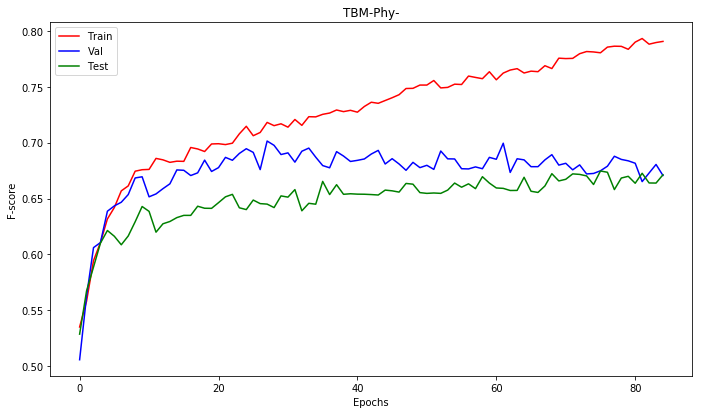

  0%|          | 4/2517 [00:00<01:28, 28.25it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=85=#==#==#==#==#=


100%|██████████| 2517/2517 [01:50<00:00, 22.83it/s]


==========Epoch No:85==========
Training Loss: 1151.55531991
Train: (0.7958069968694682, 0.7981724274930473, 0.7932410028966318, None)
                    0            1
Precision    0.772787     0.809091
Recall       0.635179     0.892231
F-score      0.697259     0.848629
Count      921.000000  1596.000000
--------
Val: (0.6659871505587007, 0.6746031746031746, 0.6660468859294943, None)
                    0           1
Precision    0.597938    0.708716
Recall       0.477366    0.798450
F-score      0.530892    0.750911
Count      243.000000  387.000000
--------
Test: (0.6725946599791828, 0.6810673443456162, 0.6736266685964982, None)
                    0           1
Precision    0.594262    0.720074
Recall       0.488215    0.797959
F-score      0.536044    0.757018
Count      297.000000  490.000000




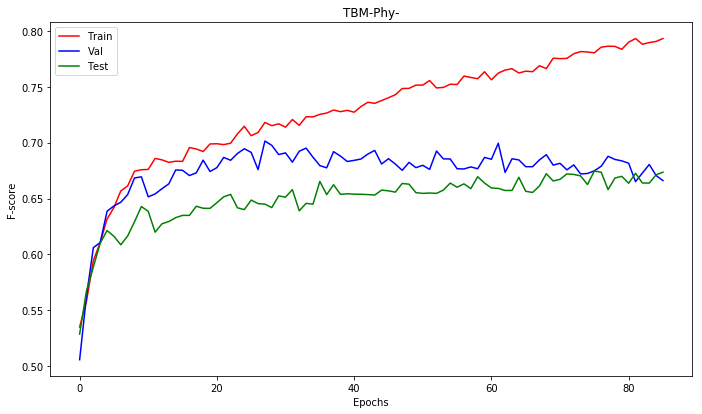

  0%|          | 3/2517 [00:00<01:44, 24.06it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=86=#==#==#==#==#=


100%|██████████| 2517/2517 [01:45<00:00, 23.79it/s]


==========Epoch No:86==========
Training Loss: 1150.00826696
Train: (0.798608823548568, 0.8001589193484306, 0.7943198680351903, None)
                    0            1
Precision    0.785519     0.806162
Recall       0.624321     0.901629
F-score      0.695705     0.851227
Count      921.000000  1596.000000
--------
Val: (0.6735769805284935, 0.680952380952381, 0.6742798058080336, None)
                    0           1
Precision    0.603960    0.717290
Recall       0.502058    0.793282
F-score      0.548315    0.753374
Count      243.000000  387.000000
--------
Test: (0.6674421203810833, 0.6759847522236341, 0.6687825227313942, None)
                    0           1
Precision    0.585366    0.717190
Recall       0.484848    0.791837
F-score      0.530387    0.752667
Count      297.000000  490.000000




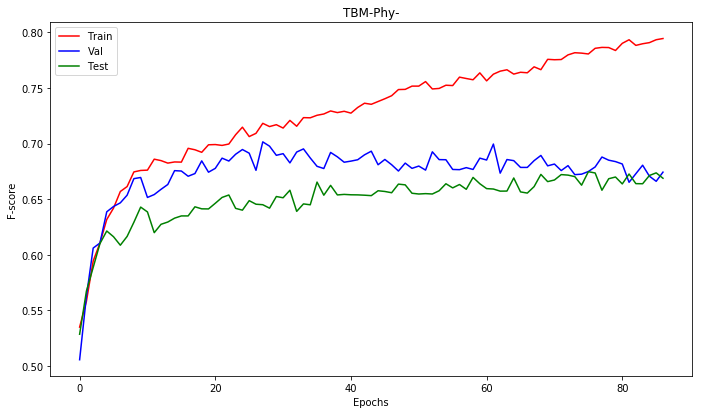

  0%|          | 3/2517 [00:00<01:27, 28.68it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=87=#==#==#==#==#=


100%|██████████| 2517/2517 [01:45<00:00, 23.85it/s]


==========Epoch No:87==========
Training Loss: 1139.29957907
Train: (0.8058827558433121, 0.8073102900278109, 0.802129975426006, None)
                    0            1
Precision    0.793011     0.813311
Recall       0.640608     0.903509
F-score      0.708709     0.856040
Count      921.000000  1596.000000
--------
Val: (0.6822496413199427, 0.6888888888888889, 0.6829741379310345, None)
                    0           1
Precision    0.614634    0.724706
Recall       0.518519    0.795866
F-score      0.562500    0.758621
Count      243.000000  387.000000
--------
Test: (0.6681916422235152, 0.6759847522236341, 0.6698179686194138, None)
                    0           1
Precision    0.583333    0.719626
Recall       0.494949    0.785714
F-score      0.535519    0.751220
Count      297.000000  490.000000




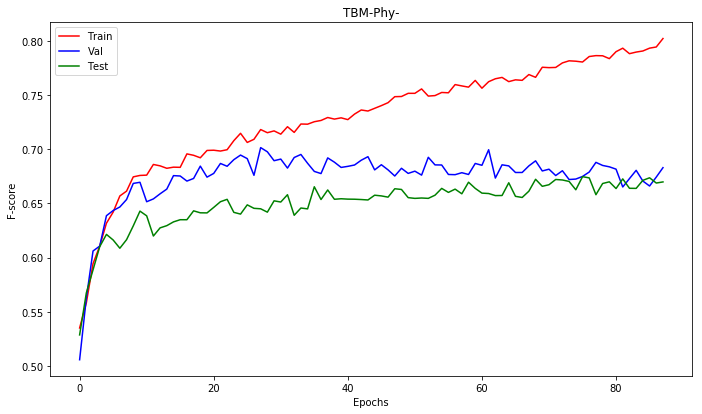

  0%|          | 3/2517 [00:00<01:37, 25.70it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=88=#==#==#==#==#=


100%|██████████| 2517/2517 [01:49<00:00, 23.07it/s]


==========Epoch No:88==========
Training Loss: 1134.30125514
Train: (0.8094933721046083, 0.8104886769964244, 0.8051742875391281, None)
                    0            1
Precision    0.800813     0.814503
Recall       0.641694     0.907895
F-score      0.712477     0.858667
Count      921.000000  1596.000000
--------
Val: (0.6729046563192904, 0.6777777777777778, 0.6744237976645682, None)
                    0           1
Precision    0.590909    0.724390
Recall       0.534979    0.767442
F-score      0.561555    0.745295
Count      243.000000  387.000000
--------
Test: (0.6725196245878897, 0.6785260482846251, 0.6743071810244384, None)
                    0           1
Precision    0.583333    0.726577
Recall       0.518519    0.775510
F-score      0.549020    0.750247
Count      297.000000  490.000000




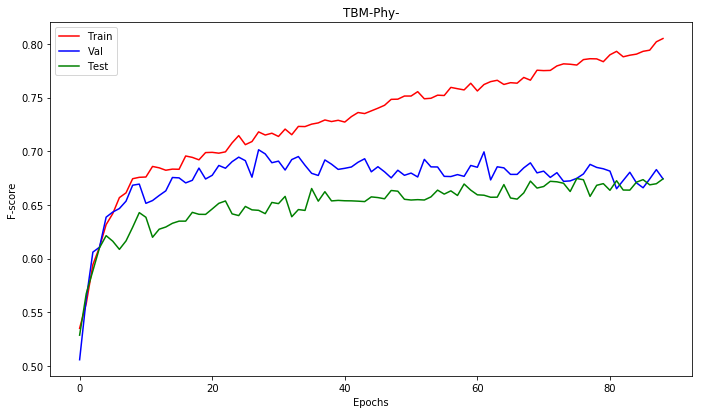

  0%|          | 3/2517 [00:00<01:30, 27.68it/s]

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  
=#==#==#==#==#=89=#==#==#==#==#=


100%|██████████| 2517/2517 [01:45<00:00, 23.87it/s]


==========Epoch No:89==========
Training Loss: 1128.5565771
Train: (0.8083015197566156, 0.8096940802542709, 0.8047229762663544, None)
                    0            1
Precision    0.795455     0.815715
Recall       0.646037     0.904135
F-score      0.713002     0.857652
Count      921.000000  1596.000000
--------
Val: (0.6711014612824432, 0.6761904761904762, 0.6726491553559223, None)
                    0           1
Precision    0.589041    0.722628
Recall       0.530864    0.767442
F-score      0.558442    0.744361
Count      243.000000  387.000000
--------
Test: (0.671674762426158, 0.6772554002541296, 0.673465003912054, None)
                    0           1
Precision    0.580524    0.726923
Recall       0.521886    0.771429
F-score      0.549645    0.748515
Count      297.000000  490.000000




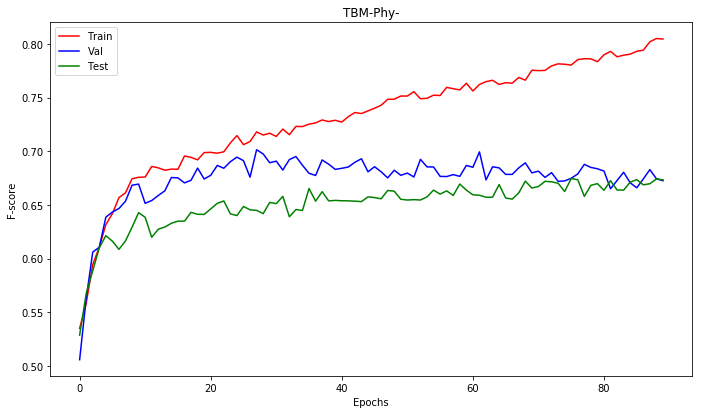

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  


In [8]:
start_epoch = 0
end_epoch = 90
model_name = params['model_name']
for iter_ in range(start_epoch, end_epoch):
    print "=#="*5+str(iter_)+"=#="*5
    total_loss = 0
    preds_train = []
    actual_train = []
    for each_ID in tqdm(data['train_ids']):
#         print each_ID
        model_RNN.zero_grad()
        tag_scores = model_RNN(data['data'], each_ID)
        
        _, ind_ = torch.max(tag_scores, dim=1)
        preds_train+=ind_.tolist()
        
        curr_labels = [data['data'][each_ID][-1]]
        curr_labels = [batchify.label_mapping[x] for x in curr_labels]
        actual_train+=curr_labels
        curr_labels = torch.cuda.LongTensor(curr_labels)
        curr_labels = autograd.Variable(curr_labels)
        
        loss = loss_function(tag_scores, curr_labels.reshape(tag_scores.shape[0]))
        total_loss+=loss.item()
#         print tag_scores
#         print curr_labels
#         print total_loss

        loss.backward()
        optimizer.step()
    df_tr = pd.DataFrame(list(precision_recall_fscore_support(actual_train, preds_train, labels = [0,1])),
                       columns = [0,1])
    df_tr.index = ['Precision','Recall','F-score','Count']
    prf_tr = precision_recall_fscore_support(actual_train, preds_train, average='weighted')
#     prf_tr, df_tr = evaluate_(model_RNN, data, 'train_ids')
    prf_test, df_test = eval_plot.evaluate_dbm(model_RNN, data, 'test_ids')
    prf_val, df_val = eval_plot.evaluate_dbm(model_RNN, data, 'val_ids')
    
    df_all = pd.concat([df_tr, df_val, df_test],axis=1)
    dict_df_prf_mod['Epoch'+str(iter_)] = df_all
    
    print '=='*5 + "Epoch No:"+str(iter_) +"=="*5
    print "Training Loss: "+str(total_loss)
    print "=="*4
    print "Train: " + str(prf_tr)
    print df_tr
    print "--"*4
    print "Val: " + str(prf_val)
    print df_val
    print "--"*4
    print "Test: " + str(prf_test)
    print df_test
    print '=='*40
    print '\n'
    if(save_flag):
        torch.save(model_RNN, '../../Models/'+model_name+str(iter_)+'.pt')
        pickle.dump(dict_df_prf_mod, open('../../Results/dict_prf_'+model_name+str(iter_)+'.pkl','wb'))
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_+1, 
                              model_name)

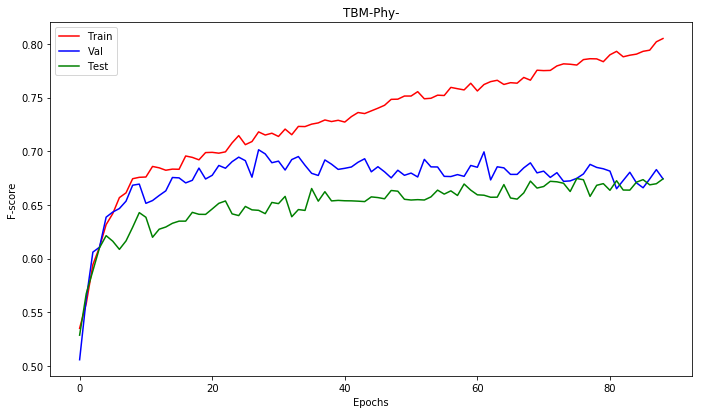

==========Epoch27========
TRAIN: (0.7260596258973161, 0.7318235995232419, 0.7181370899997287)
VAL: (0.7033206947162427, 0.7095238095238096, 0.7014742498880431)
TEST: (0.6429686378225765, 0.6531130876747141, 0.6450202411428049)
======== Detailed Results ========
                    0            1           0           1           0  \
Precision    0.694006     0.744557    0.656250    0.732877    0.549180   
Recall       0.477742     0.878446    0.518519    0.829457    0.451178   
F-score      0.565916     0.805979    0.579310    0.778182    0.495379   
Count      921.000000  1596.000000  243.000000  387.000000  297.000000   

                    1  
Precision    0.699816  
Recall       0.775510  
F-score      0.735721  
Count      490.000000  


In [9]:
        eval_plot.plot_graphs(dict_df_prf_mod, 'F-score', 
                              '../../Plots/'+model_name+str(iter_)+'.png',
                              0, iter_, 
                              model_name)